In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
def reduce_memory_usage(df):
    
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memmory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)   
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        end_mem = df.memory_usage().sum() / 1024**2
        print('Memory usage after optimization is {:.2f} MB'.format(end_mem))
        print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem)/start_mem))
        
        return df

foo <font color='red'>bar</font> foo


# Previous Application:
- All previous application for Home Credit loans of client who have loans in our sample 
- There is one row for each previous application related to loans in our data sample

In [6]:
previous_application = reduce_memory_usage(pd.read_csv('previous_application.csv'))
previous_application.head(10)

Memmory usage of dataframe is 471.48 MB
Memory usage after optimization is 465.11 MB
Decreased by 1.4%


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,...,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int32  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [8]:
previous_application.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

# Variables Meaning/inteprepration:
- **SK_ID_PREV**: **ID của previous loan** (1 loan in our sample can have 0, 1, 2 or more previous loan application in Home Credit, previous application could, but not necessarily have to lead to credit i.e customer repay the loan fully and on time)

- **SK_ID_CURR**: **ID of current loan**

- **NAME_CONTACT_TYPE**: **loại hình của khoản vay** **[4 types]** (Cash loans, Consumer loans, Revolving loans, XNA)

- **AMT_ANNUITY**: Annuity of previous application **(trái phiếu đồng niên)**

- **AMT_APPLICATION**: For how much credit did client ask on the previous application **(số tiền đăng kí vay)**

- **AMT_CREDIT**: Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that AMT_APPLICATION is the amount for which the client initially applied for, but during our approval precess he/she could have received different amount i.t AMT_CREDIT **(số tiền thực sự nhận được)** {i do not know, but is the credit institution has more right than the applicant to decide how much the loans is??}

- **AMT_DOWN_PAYMENT**: down payment on the previous application **(tiền trả trước, tiền đặt cọc)**

- **AMT_GOODS_PRICE**: Goods price of good that client asked for (if applicable) on the previous application **(giá của sản phầm của lần vay lần trước)**

- **WEEKDAY_APPR_PROCESS_START**: On which day of the week did the client apply for previous application **(ngày đăng kí apply khoản vay i.e the previous loan)**

- **HOUR_APPR_PROCESS_START**: Approximately at what day hour did the client apply for the previous application **(giờ đăng kí)**

- **FLAG_LAST_APPL_PER_CONTRACT**: Flag if it was the last application for the previous contract. Sometimes by mistake of client or our clerk there could be more applications for one sigle contract **(đánh dấu đây là application cuối cùng của contract cho vay, đôi khi vì lỗi bất cẩn nào đó mà có nhiều applications cho một contract)** --> {So, maybe phải làm nhiều application do lỗi chính tả hay lỗi gì đó, nhưng những bản application đó có thể giống nhau, Y = N somehow}

- **NFLAG_LAST_APPL_IN_DAY**: Flag if it was last application per day of the client. Sometimes clients apply for more applications a day. Rarely it could also be error in our system that one application is in the base twice **(đánh dấu dòng là application cuối cunbf trong ngày của khách, đôi khi khánh apply nhiều lần trong 1 ngày)**

- **NLAG_MICRO_CASH**: Flag micro finanace loan **(đánh dấu vay tài chính vi mô)**

- **RATE_DOWN_PAYMENT**: Down payment rate normalized on previous credit **(tỉ lệ tiền đặt cọ normalized)**

- **RATE_INTEREST_PRIMARY**: Interest rate normalized on previous credit **(tỉ lệ lãi xuất normalized)**

- **RATE_INTEREST_PRIVILEGED**: Interest rate normalized on previous credit **(tỉ lê lãi xuấy ưu tiên)**

- **NAME_CASH_LOAN_PURPOSE**: Purpose of the cash loan **(Mục đích vay)**

- **NAME_CONTRACT_STATUS**: Contract status of previous application **(tình trạng hợp đồng approved, cancelled,..)**

- **DAYS_DECISION**: Relative to current application when was the decision about previous made **(số ngày)**

- **NAME_PAYMENT_TYPE**: Payment method that client chose to pay for the previous application 

- **CODE_REJECT_REASON**: Why was the previous application rejected **(lí do previous application bị từ chối)**

- **NAME_TYPE_SUITE**: Who accompanied client when applying for the previous application **(Người đã đồng hành cùng khách hàng khi nộp đơn đăng ký trước)**

- **NAEM_CLIENT_TYPE**: Was the client old or new client when applying for the previous application **(phân lọại người vay mới/cũ)**

- **NAME_GOODS_CATEGORY**: What kind of goods did the client apply for in the previous application **(Loại hàng hóa mà khách hàng đã đăng ký trong lần nộp đơn trước, to buy)**

- **NAME_PORTFOLIO**: Was the previous application for CASH, POS, CAR,...**(loaị hình vay)**

- **NAME_PRODUCT_TYPE**: Was the previous application x-sell or walk-in **(bán chéo/walk-in)**

- **CHANNEL_TYPE**: Through which channel we acquired the client on the previous application **(get the client thông qua kênh nào)**

- **SELLLERPLACE_AREA**: Selling area of seller place of the previous application **(khu vực bán)**

- **NAME_SELLER_INDUSTRY**: The industry of the seller **(lĩnh vực của người bán)**

- **CNT_PAYMENT**: Term of previous credit at application of the previous application **(thời hạn của tính dụng trước)**

- **NAME_YIELD_GROUP**: Grouped interest rate into small medium and high of the previous application **(phân khúc của interest rate)**

- **PRODUCT_COMBINATION**: Detailed product combination of the previous application **(sản phần kết hợp của lần vay trước)**

- **DAY_FIRST_DRAWING**: Realtive to application date of current application when was the first disvursement of the previous application **(liên hệ giữa ngày nộp đơn hiện tại với ngày giải ngân của lần vay trước)**

- **DAY_FIRST_DUE**: Relative to application date of current application when was the first due supposed to be the previous application **(liên hệ giữa ngày nộp đơn hiện tại với ngày đáo hạn của lần vay trước)**

- **DAYS_LAST_DUE_1ST_VERSION**: Relative to application date of current application when was the first due of the previous application **(liên hệ giữa ngày nộp đơn hiện tại với ngày đáo hạn đầu tiên của lần vay trước)**

- **DAYS_LAST_DUE**: Relative to application date of current application when was the last due date of the previous application **(liên hệ giữa ngày nộp đơn hiện tại với ngày đáo hạn cuối cùng của lần vay trước)**

- **DAYS_TERMINATION**: Relative to application date of current application when was the expected termination of the previous application **(liên hệ giữa ngày nộp đơn hiện tại với dự kiến chấm dứt)**

- **NFLAG_INSURED_ON_APPROVAL**: Did the client requested insureance during the previous application **(khách hàng có yêu cầu bảo hiểm hay không)**

In [21]:
previous_application.duplicated().sum()

0

In [24]:
previous_application.shape

(1670214, 37)

In [26]:
previous_application.dtypes

SK_ID_PREV                       int32
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [23]:
previous_application.nunique()

SK_ID_PREV                     1670214
SK_ID_CURR                      338857
NAME_CONTRACT_TYPE                   4
AMT_ANNUITY                     357959
AMT_APPLICATION                  93885
AMT_CREDIT                       86803
AMT_DOWN_PAYMENT                 29278
AMT_GOODS_PRICE                  93885
WEEKDAY_APPR_PROCESS_START           7
HOUR_APPR_PROCESS_START             24
FLAG_LAST_APPL_PER_CONTRACT          2
NFLAG_LAST_APPL_IN_DAY               2
RATE_DOWN_PAYMENT               207033
RATE_INTEREST_PRIMARY              148
RATE_INTEREST_PRIVILEGED            25
NAME_CASH_LOAN_PURPOSE              25
NAME_CONTRACT_STATUS                 4
DAYS_DECISION                     2922
NAME_PAYMENT_TYPE                    4
CODE_REJECT_REASON                   9
NAME_TYPE_SUITE                      7
NAME_CLIENT_TYPE                     4
NAME_GOODS_CATEGORY                 28
NAME_PORTFOLIO                       5
NAME_PRODUCT_TYPE                    3
CHANNEL_TYPE             

In [33]:
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [34]:
missing_data(previous_application)

,Total,Percent
RATE_INTEREST_PRIVILEGED,1664263,99.643698
RATE_INTEREST_PRIMARY,1664263,99.643698
AMT_DOWN_PAYMENT,895844,53.636480
RATE_DOWN_PAYMENT,895844,53.636480
NAME_TYPE_SUITE,820405,49.119754
NFLAG_INSURED_ON_APPROVAL,673065,40.298129
DAYS_TERMINATION,673065,40.298129
DAYS_LAST_DUE,673065,40.298129
DAYS_LAST_DUE_1ST_VERSION,673065,40.298129
DAYS_FIRST_DUE,673065,40.298129


In [50]:
missing_value_df = previous_application.isnull().sum().sort_values(ascending = False).reset_index()
missing_value_df.columns = ['Feature', 'total']
missing_value_df
missing_value_df['Percent'] = (missing_value_df['total'] / previous_application.shape[0]) * 100
missing_value_df

,Feature,total,Percent
0,RATE_INTEREST_PRIVILEGED,1664263,99.643698
1,RATE_INTEREST_PRIMARY,1664263,99.643698
2,AMT_DOWN_PAYMENT,895844,53.636480
3,RATE_DOWN_PAYMENT,895844,53.636480
4,NAME_TYPE_SUITE,820405,49.119754
5,NFLAG_INSURED_ON_APPROVAL,673065,40.298129
6,DAYS_TERMINATION,673065,40.298129
7,DAYS_LAST_DUE,673065,40.298129
8,DAYS_LAST_DUE_1ST_VERSION,673065,40.298129
9,DAYS_FIRST_DUE,673065,40.298129


<AxesSubplot:xlabel='Percent', ylabel='Feature'>

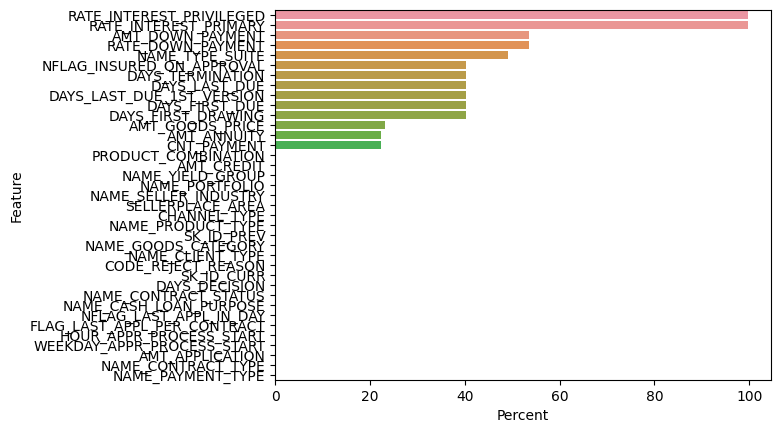

In [55]:

sns.barplot( x = missing_value_df['Percent'], y = missing_value_df['Feature'])

## Comment:
- Drop **RATE_INTEREST_PRIVILEGED**, **RATE_INTEREST_PRIMARY** as 99% of missing data

In [56]:
previous_application.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,1670214.0,1.923089e+06,532597.958696,1.000001e+06,1.461857e+06,1.923110e+06,2.384280e+06,2845382.000
SK_ID_CURR,1670214.0,2.783572e+05,102814.823849,1.000010e+05,1.893290e+05,2.787145e+05,3.675140e+05,456255.000
AMT_ANNUITY,1297979.0,1.595512e+04,14782.137335,0.000000e+00,6.321780e+03,1.125000e+04,2.065842e+04,418058.145
AMT_APPLICATION,1670214.0,1.752339e+05,292779.762386,0.000000e+00,1.872000e+04,7.104600e+04,1.803600e+05,6905160.000
AMT_CREDIT,1670213.0,1.961140e+05,318574.616547,0.000000e+00,2.416050e+04,8.054100e+04,2.164185e+05,6905160.000
AMT_DOWN_PAYMENT,774370.0,6.697402e+03,20921.495410,-9.000000e-01,0.000000e+00,1.638000e+03,7.740000e+03,3060045.000
AMT_GOODS_PRICE,1284699.0,2.278473e+05,315396.557937,0.000000e+00,5.084100e+04,1.123200e+05,2.340000e+05,6905160.000
HOUR_APPR_PROCESS_START,1670214.0,1.248418e+01,3.334028,0.000000e+00,1.000000e+01,1.200000e+01,1.500000e+01,23.000
NFLAG_LAST_APPL_IN_DAY,1670214.0,9.964675e-01,0.059330,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000
RATE_DOWN_PAYMENT,774370.0,7.963682e-02,0.107823,-1.497876e-05,0.000000e+00,5.160508e-02,1.089091e-01,1.000


# Categorical / Object type variable EDA

In [67]:
categorical_feature_df = previous_application.value_counts()

#categorical_feature_df.sort_values(ascending = False).reset_index()

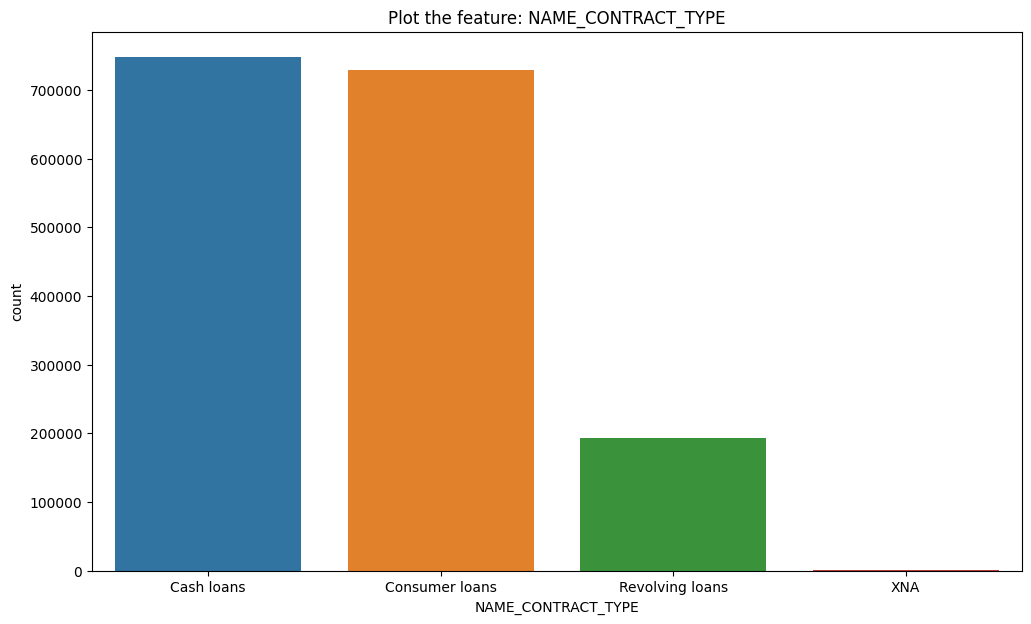

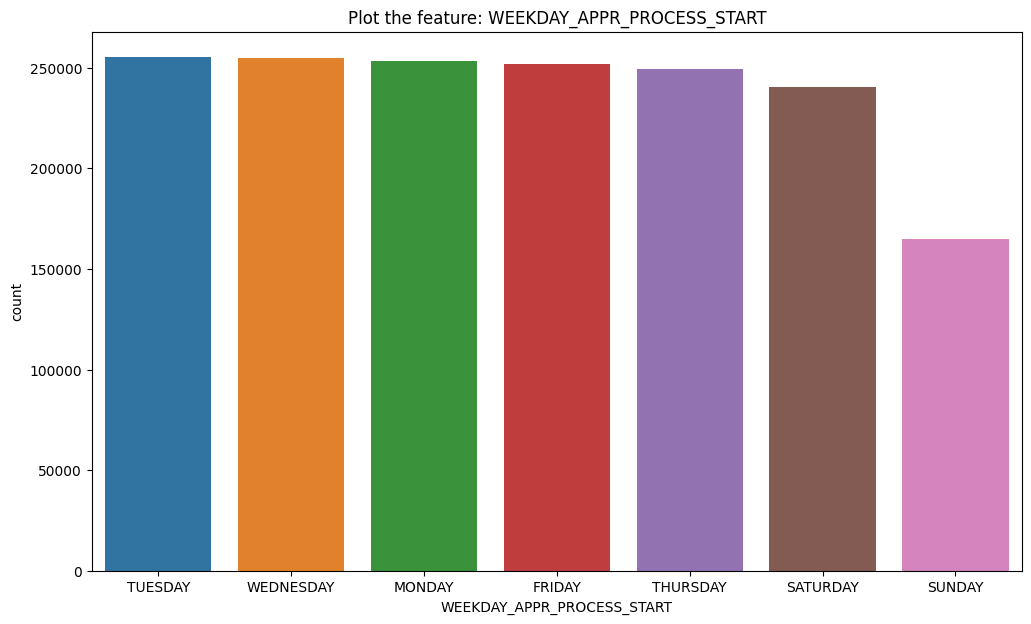

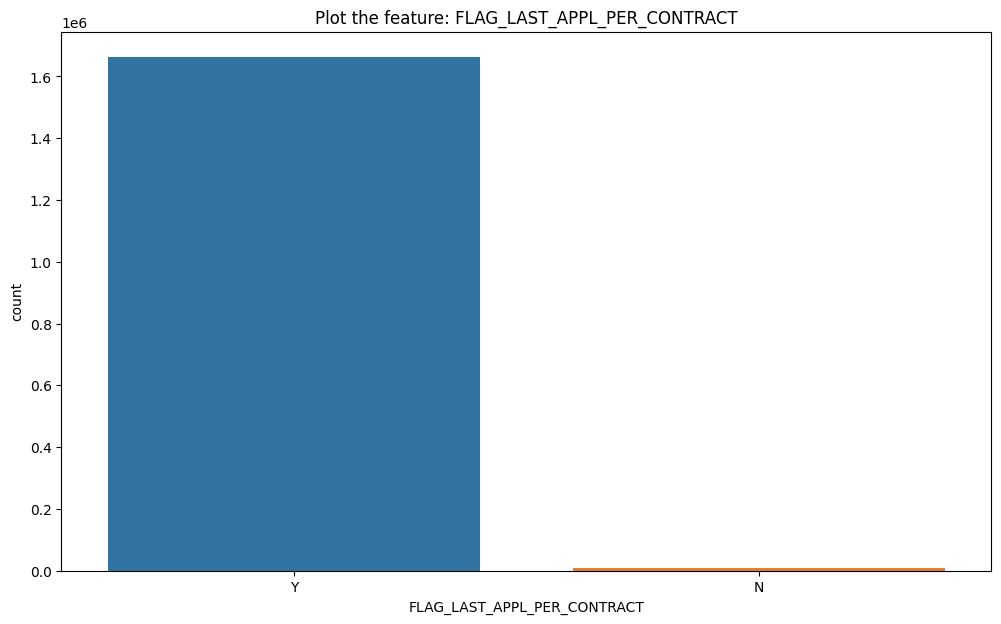

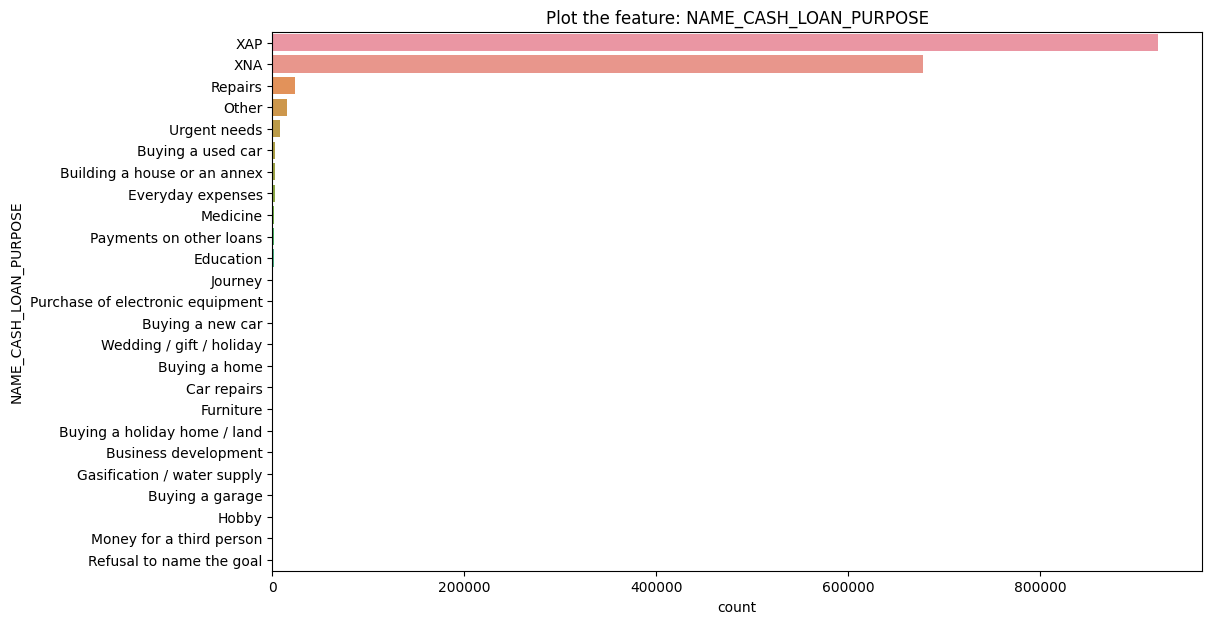

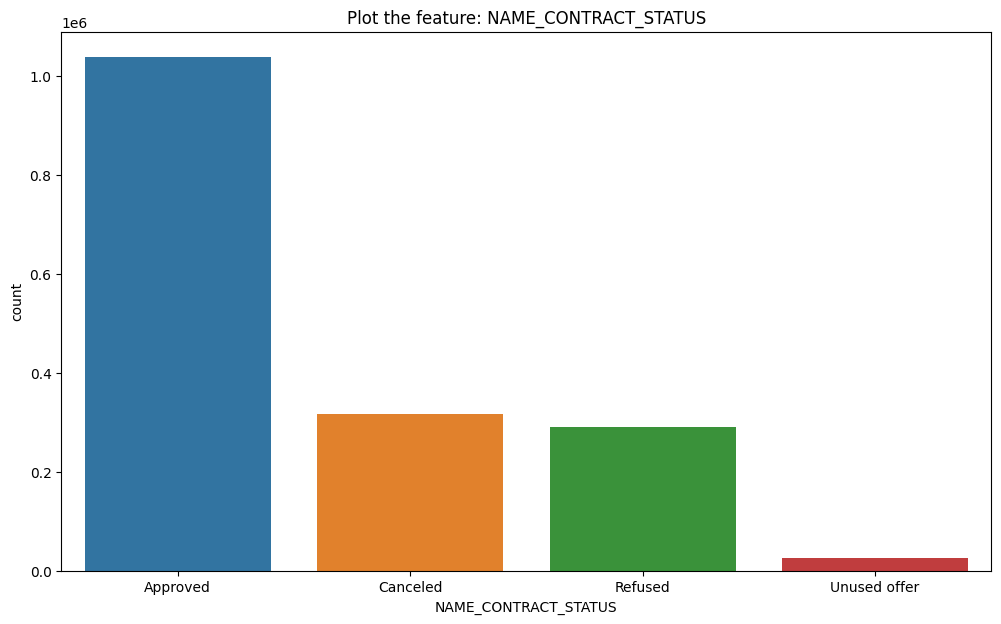

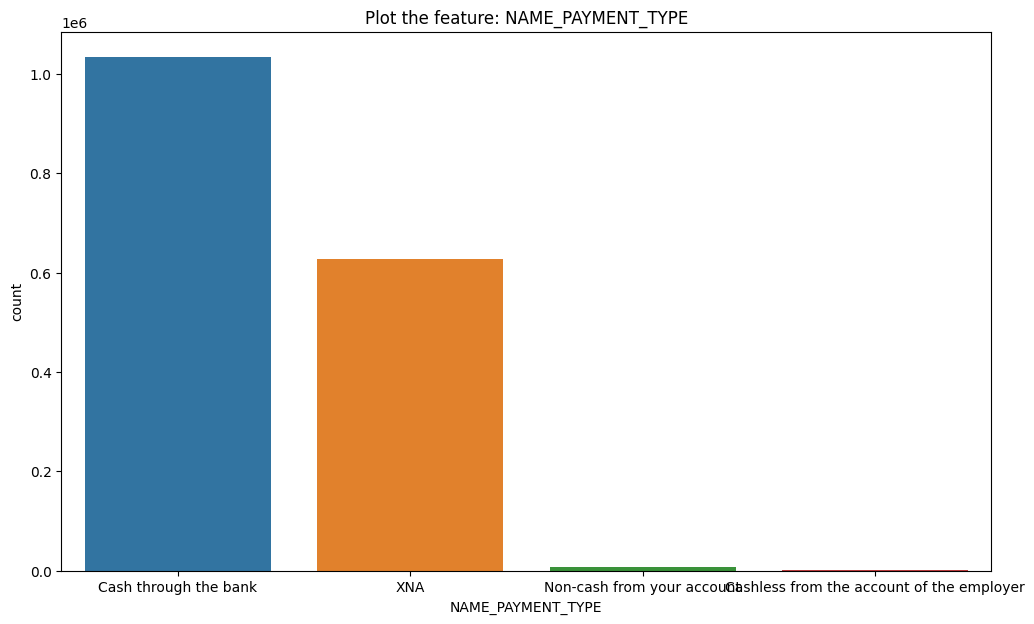

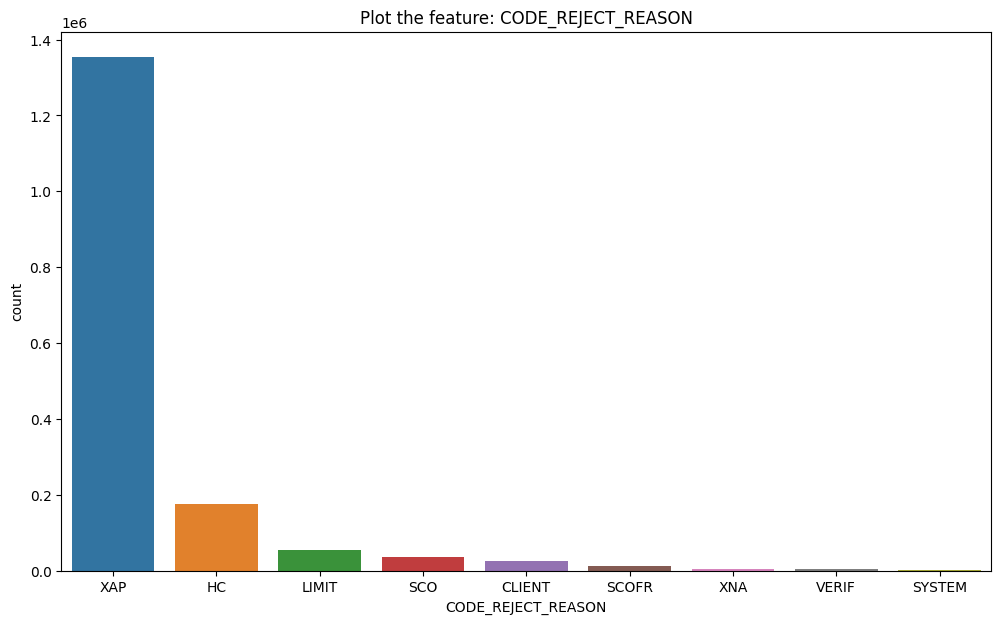

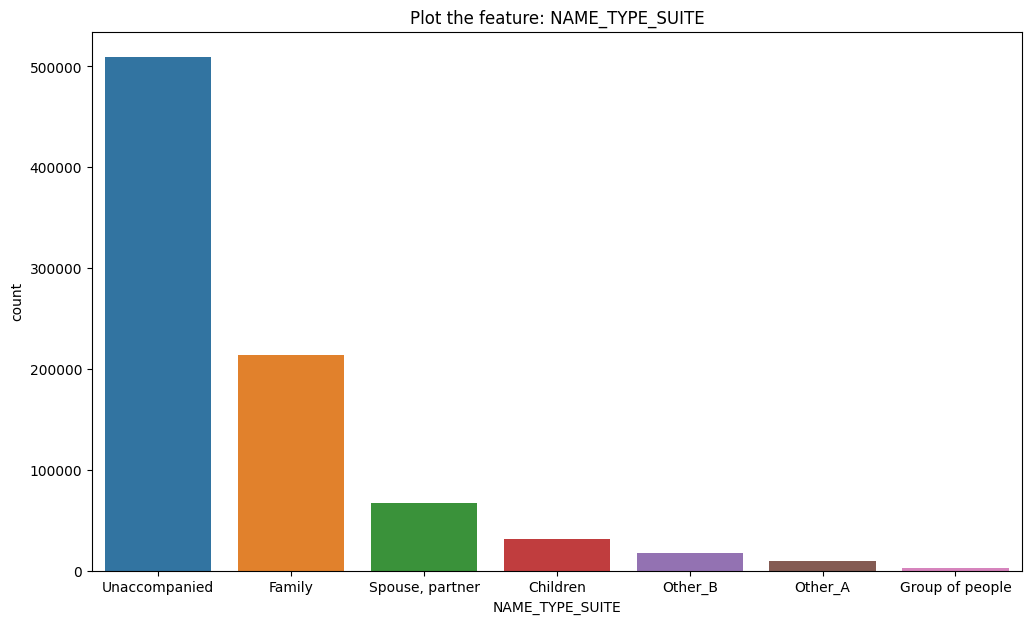

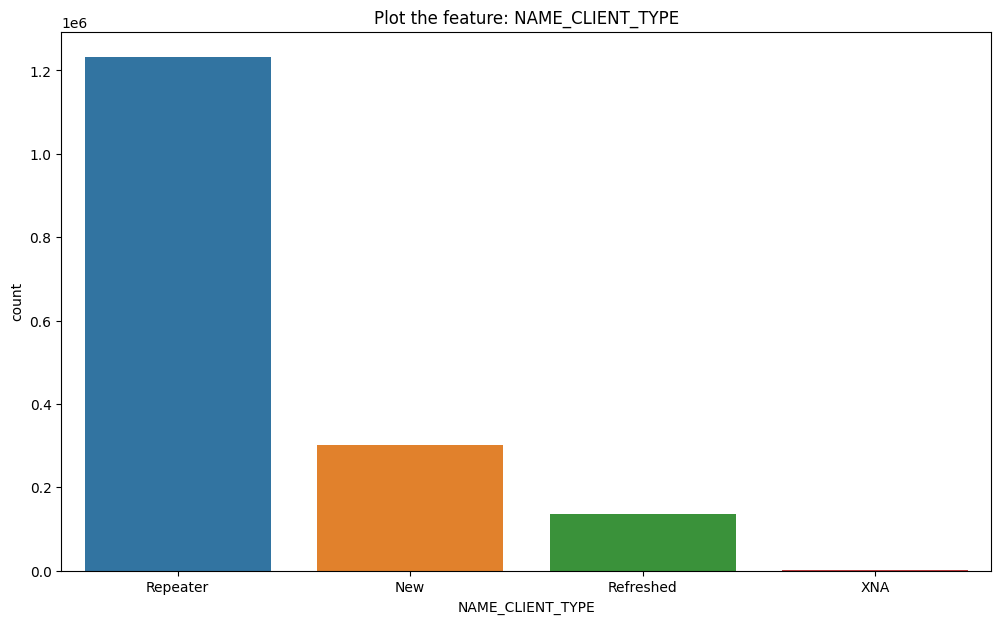

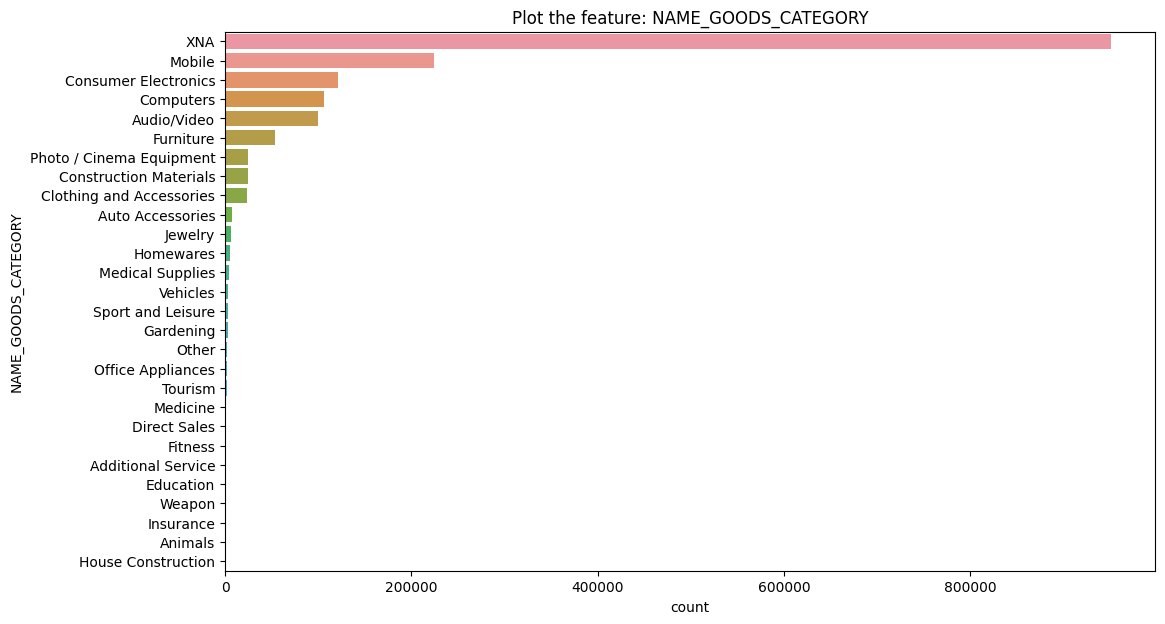

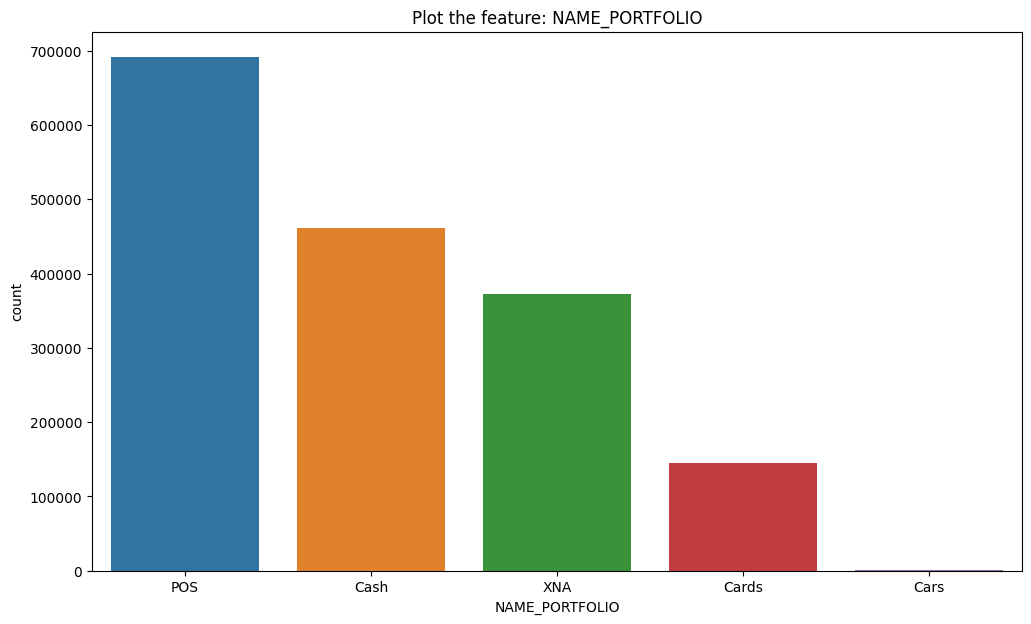

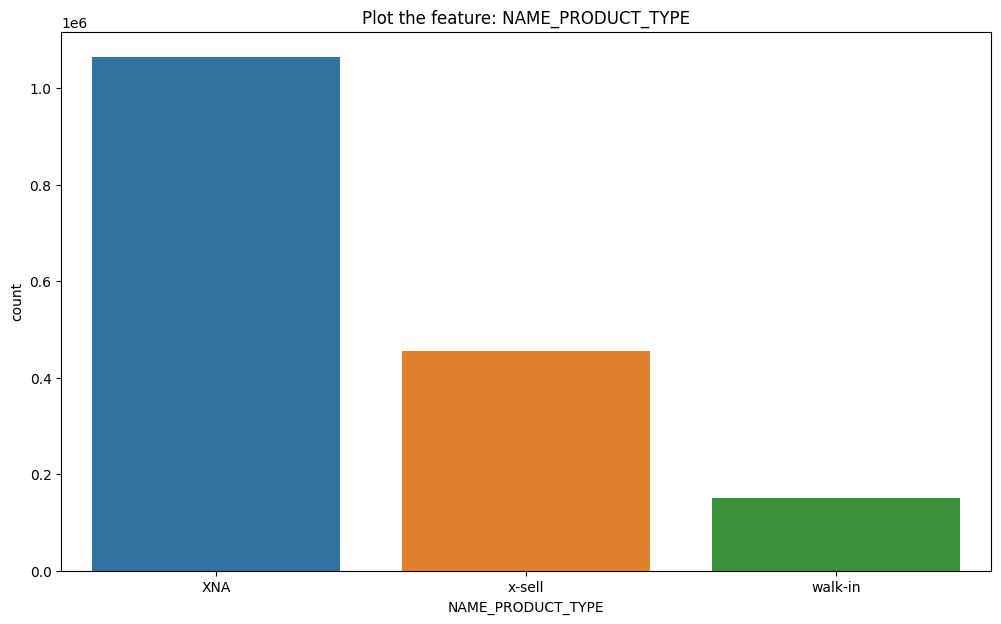

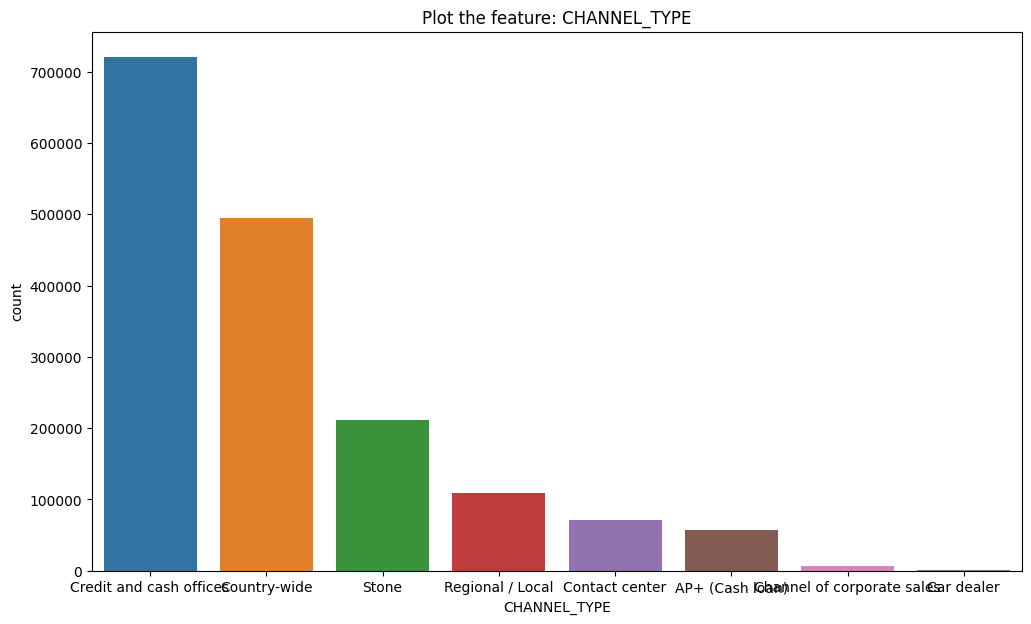

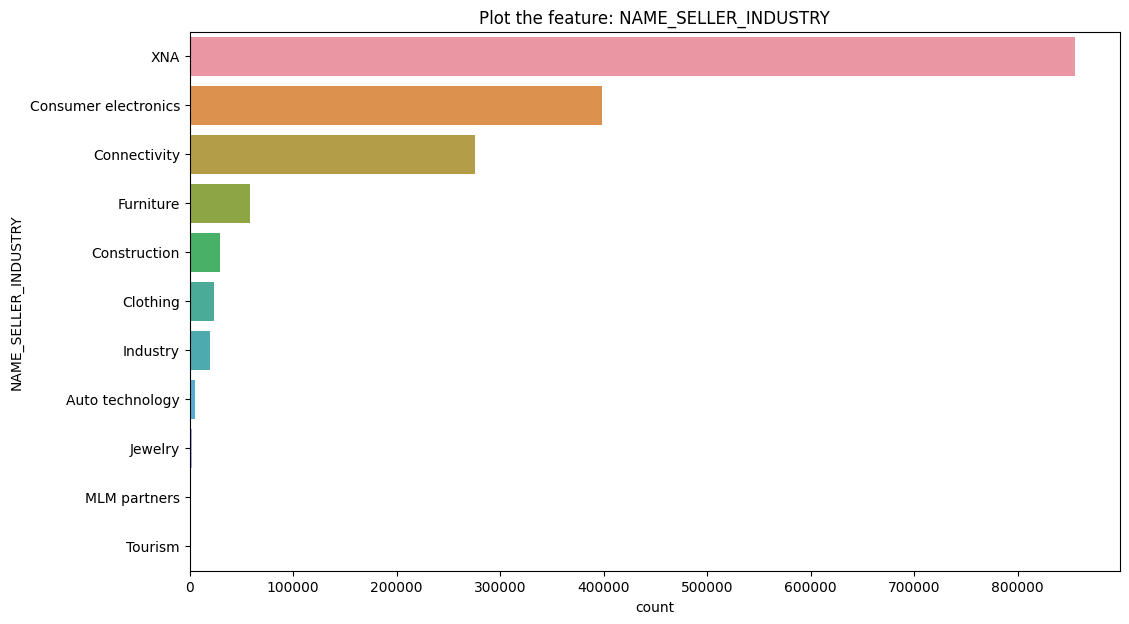

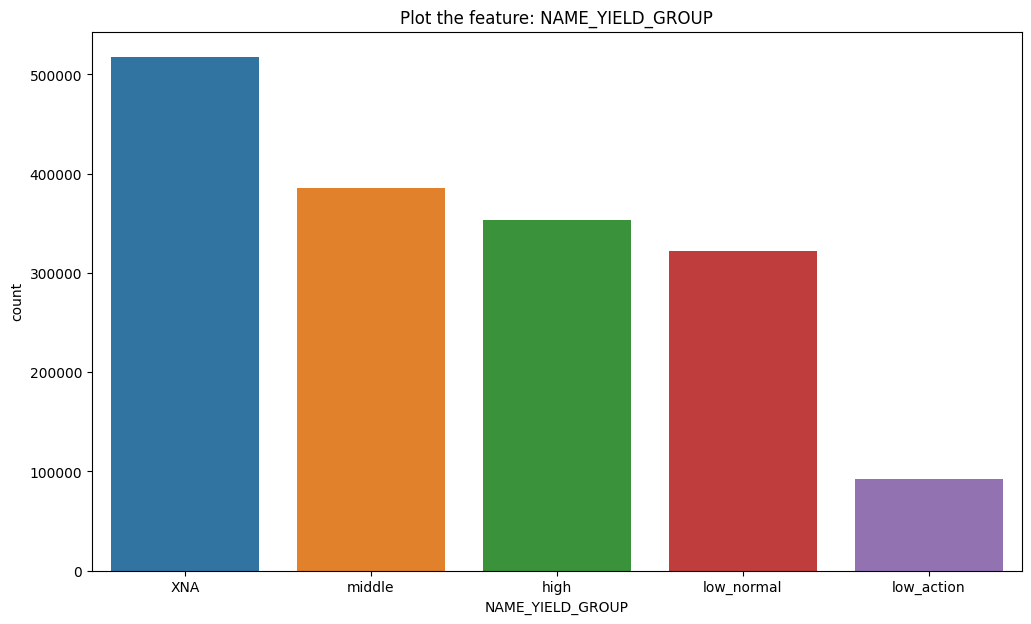

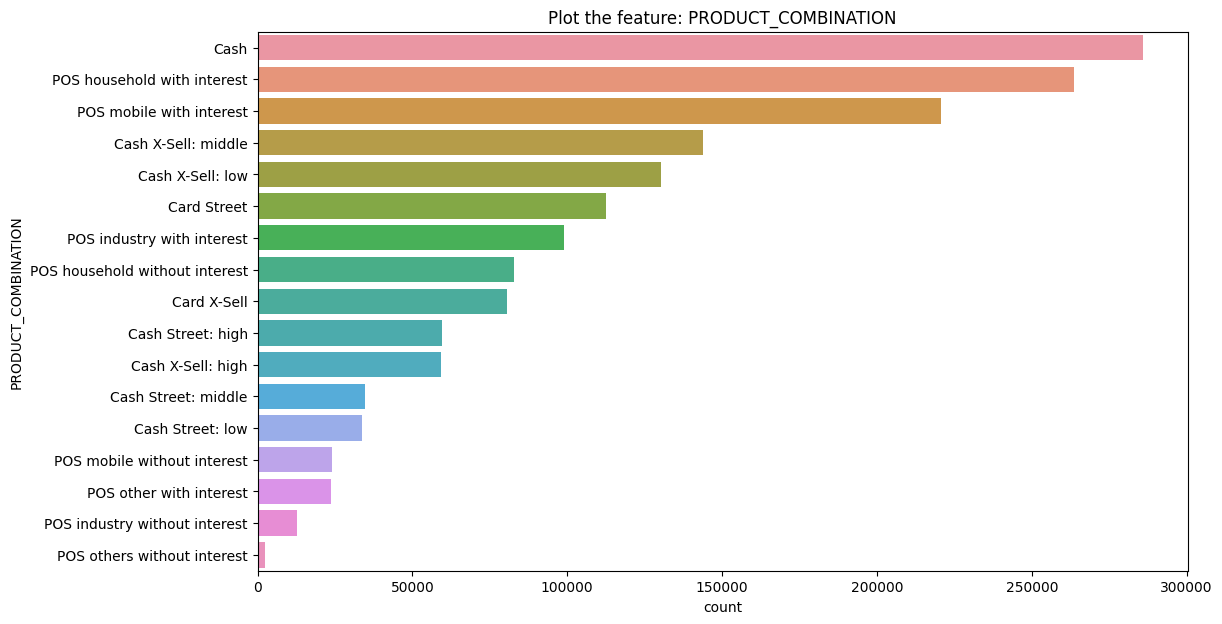

In [62]:
categorical_feature = previous_application.select_dtypes(['object']).columns.tolist()

for feature in categorical_feature:
    fig, ax = plt.subplots(figsize = (12,7))

    if previous_application[feature].nunique() < 10:
        sns.countplot(data = previous_application, x = feature, order = previous_application[feature].value_counts().index.tolist())
    else:
        sns.countplot(data = previous_application, y = feature, order = previous_application[feature].value_counts().index.tolist())
    
    ax.set_title("Plot the feature: " + feature )


## Comment:


# Numercial Variables EDA

In [73]:
numerical_feature = list(set(previous_application.columns.tolist()) - set(categorical_feature))
numerical_feature_df = previous_application[numerical_feature]
#numerical_feature_df.fillna(-1, inplace = True)
numerical_feature_df

,SK_ID_PREV,RATE_INTEREST_PRIMARY,NFLAG_INSURED_ON_APPROVAL,RATE_INTEREST_PRIVILEGED,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,RATE_DOWN_PAYMENT,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,AMT_ANNUITY,...,SK_ID_CURR,DAYS_LAST_DUE,AMT_CREDIT,SELLERPLACE_AREA,DAYS_FIRST_DRAWING,DAYS_TERMINATION,AMT_GOODS_PRICE,AMT_APPLICATION,DAYS_DECISION,CNT_PAYMENT
0,2030495,0.182832,0.0,0.867336,-42.0,300.0,0.000000,15,1,1730.430,...,271877,-42.0,17145.0,35,365243.0,-37.0,17145.0,17145.0,-73,12.0
1,2802425,NaN,1.0,NaN,-134.0,916.0,NaN,11,1,25188.615,...,108129,365243.0,679671.0,-1,365243.0,365243.0,607500.0,607500.0,-164,36.0
2,2523466,NaN,1.0,NaN,-271.0,59.0,NaN,11,1,15060.735,...,122040,365243.0,136444.5,-1,365243.0,365243.0,112500.0,112500.0,-301,12.0
3,2819243,NaN,1.0,NaN,-482.0,-152.0,NaN,7,1,47041.335,...,176158,-182.0,470790.0,-1,365243.0,-177.0,450000.0,450000.0,-512,12.0
4,1784265,NaN,NaN,NaN,NaN,NaN,NaN,9,1,31924.395,...,202054,NaN,404055.0,-1,NaN,NaN,337500.0,337500.0,-781,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,NaN,0.0,NaN,-508.0,362.0,0.000000,12,1,14704.290,...,352015,-358.0,311400.0,43,365243.0,-351.0,267295.5,267295.5,-544,30.0
1670210,2357031,NaN,0.0,NaN,-1604.0,-1274.0,0.340554,15,1,6622.020,...,334635,-1304.0,64291.5,43,365243.0,-1297.0,87750.0,87750.0,-1694,12.0
1670211,2659632,NaN,0.0,NaN,-1457.0,-1187.0,0.101401,12,1,11520.855,...,249544,-1187.0,102523.5,1370,365243.0,-1181.0,105237.0,105237.0,-1488,10.0
1670212,2785582,NaN,1.0,NaN,-1155.0,-825.0,NaN,9,1,18821.520,...,400317,-825.0,191880.0,-1,365243.0,-817.0,180000.0,180000.0,-1185,12.0


/var/folders/b0/n1lz5zk51z374mpb3hyxn5n00000gp/T/ipykernel_2153/2434537440.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(previous_application[feature].dropna(), kde = False, bins = 100, ax = ax, color = 'b')
/var/folders/b0/n1lz5zk51z374mpb3hyxn5n00000gp/T/ipykernel_2153/2434537440.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize = (15, 5))


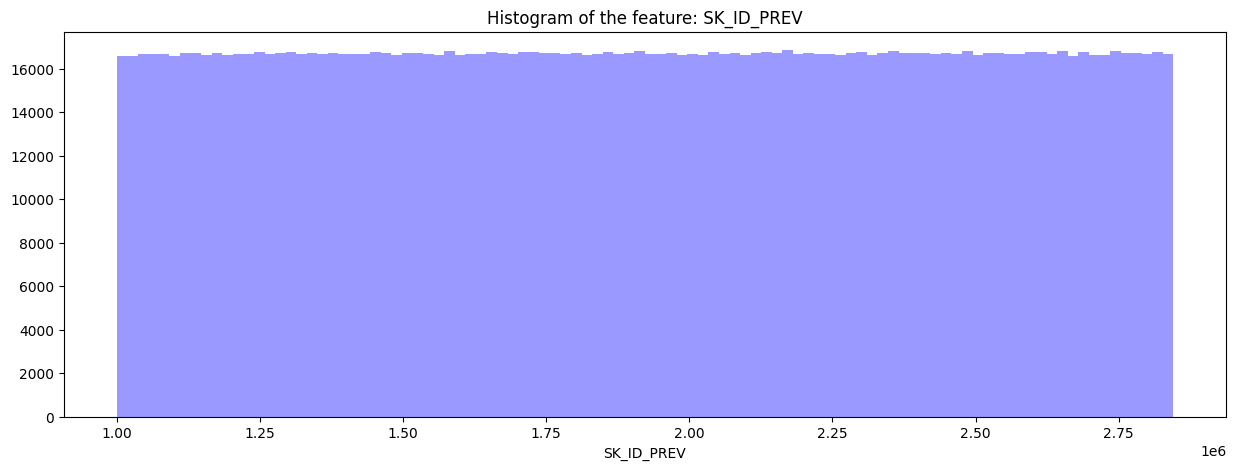

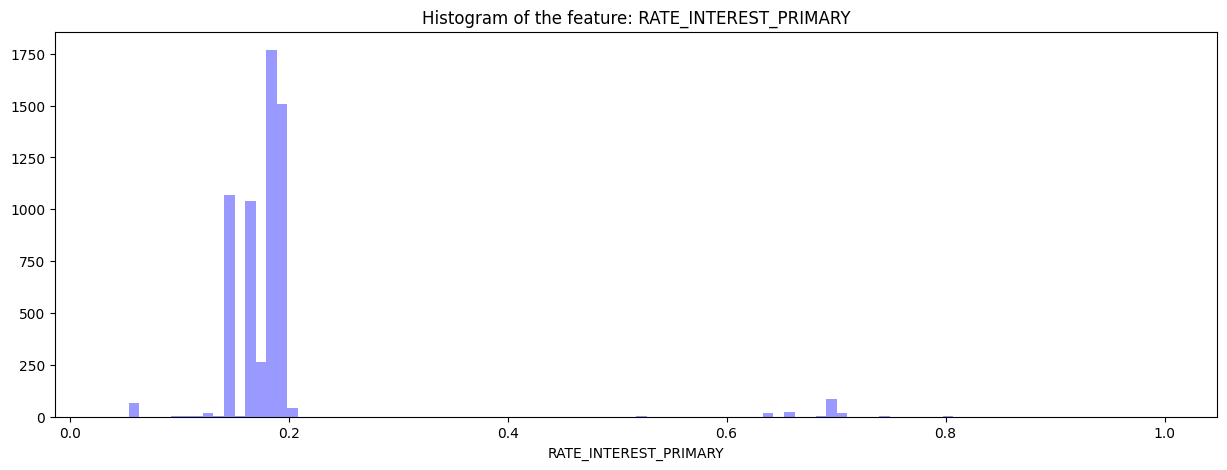

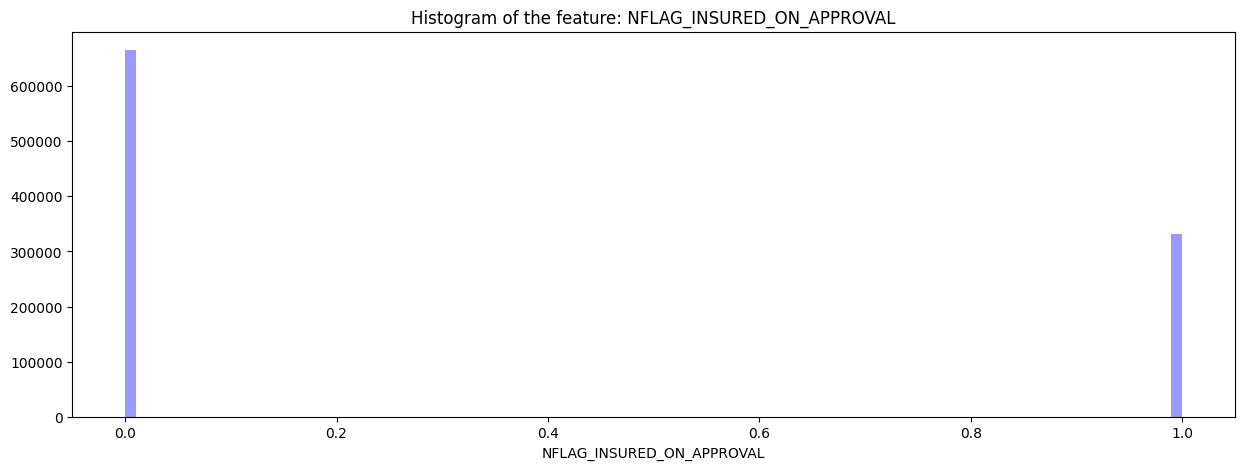

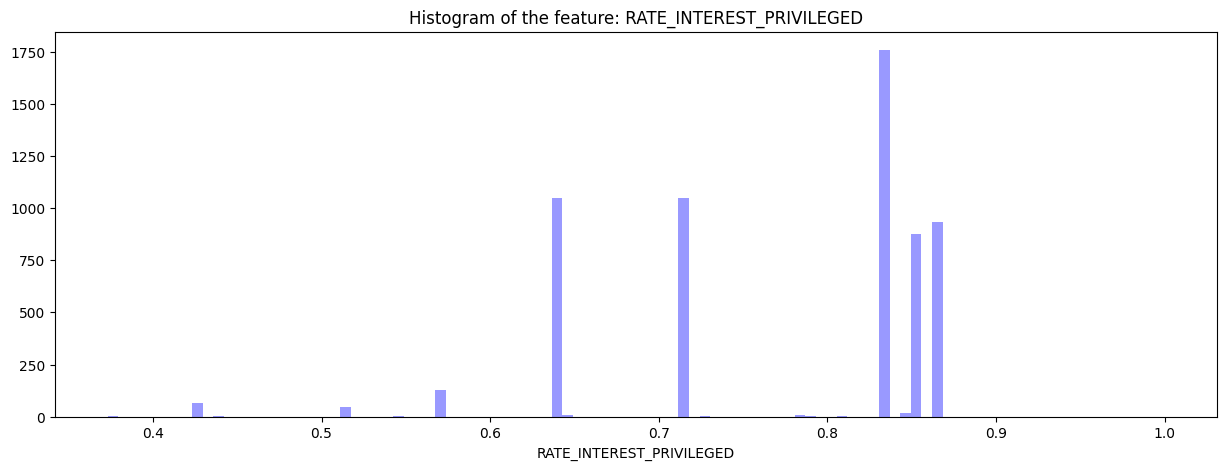

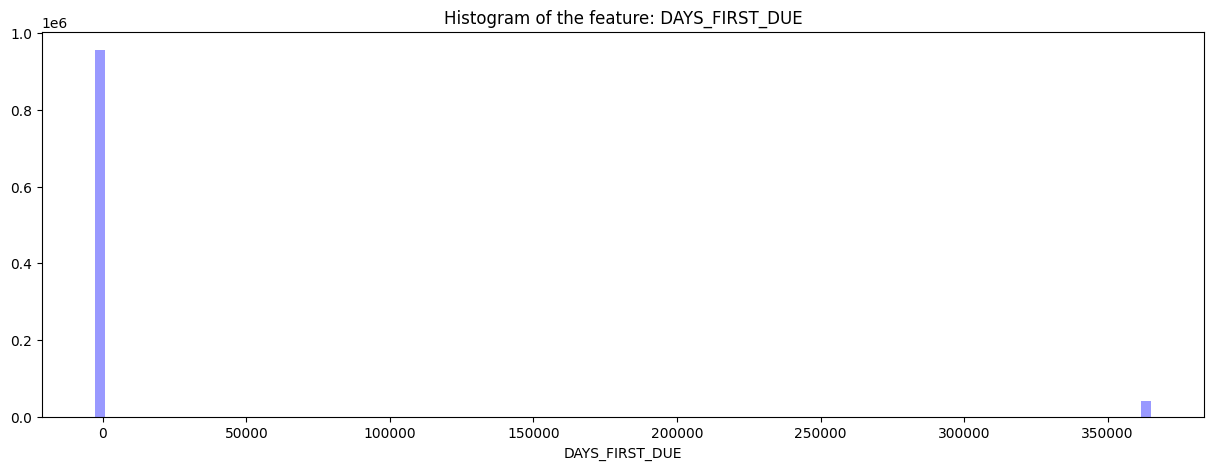

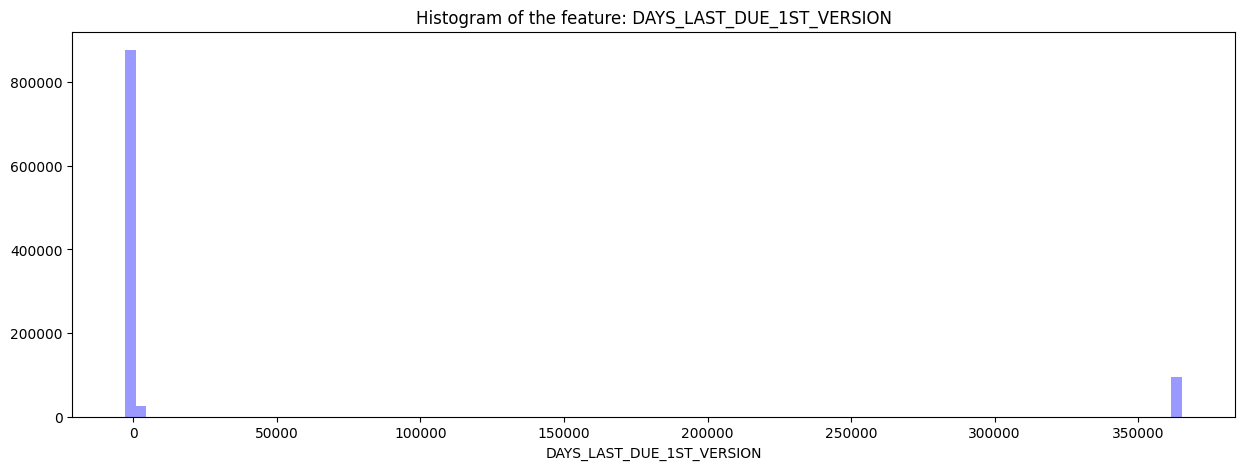

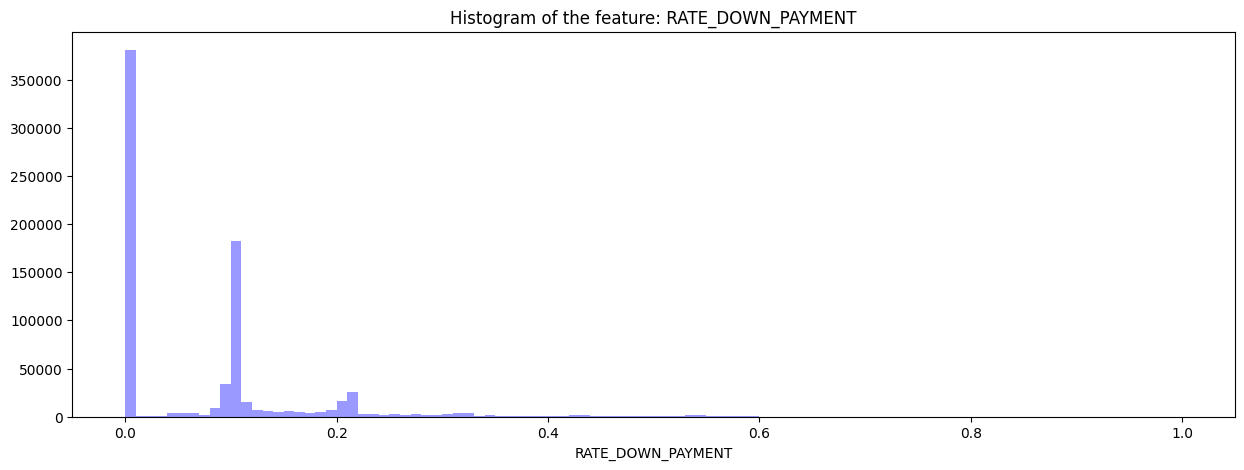

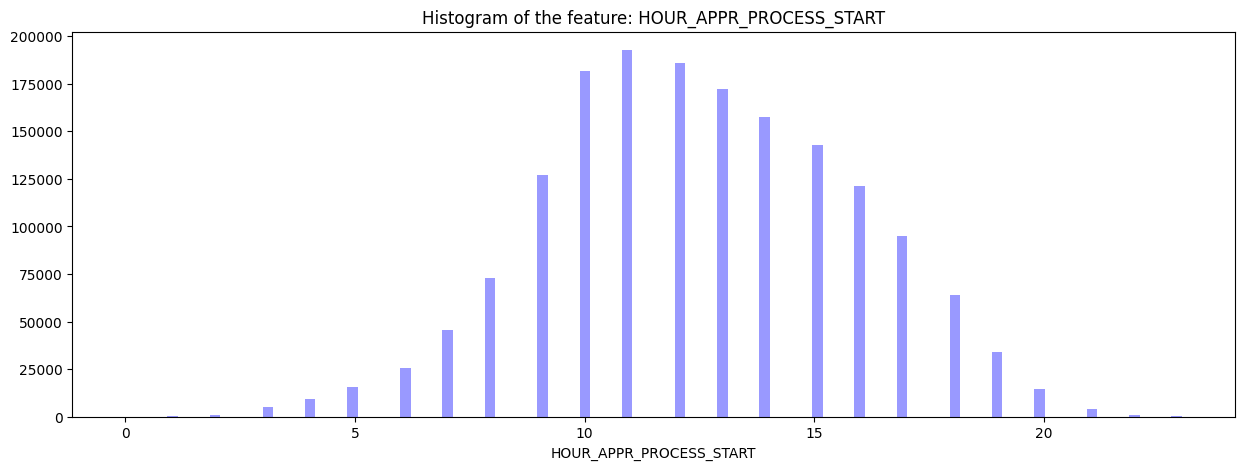

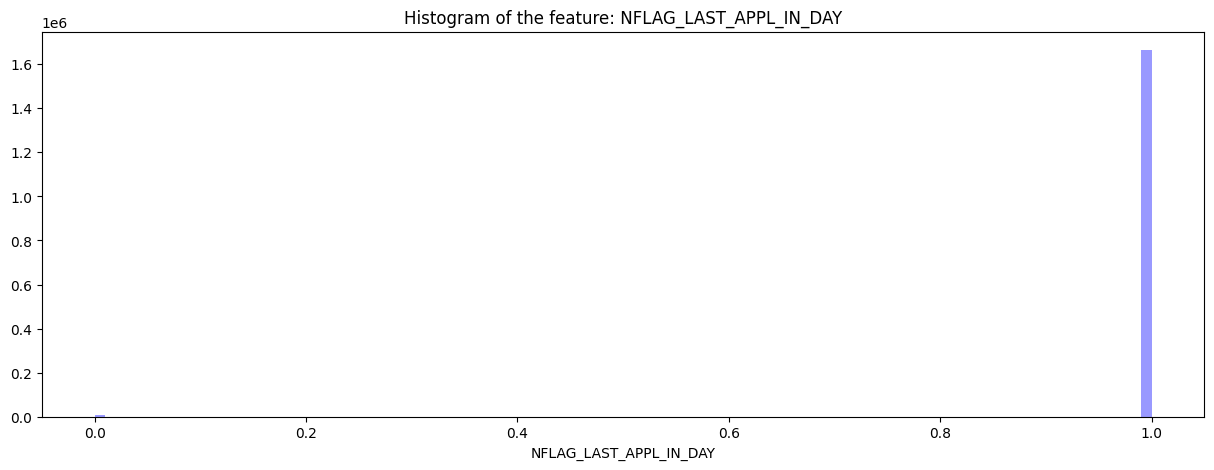

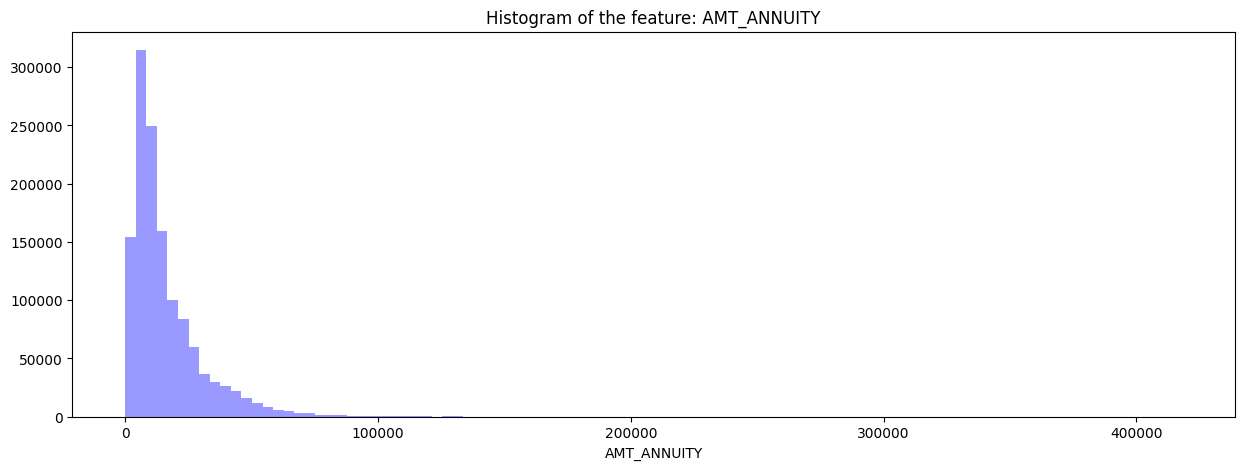

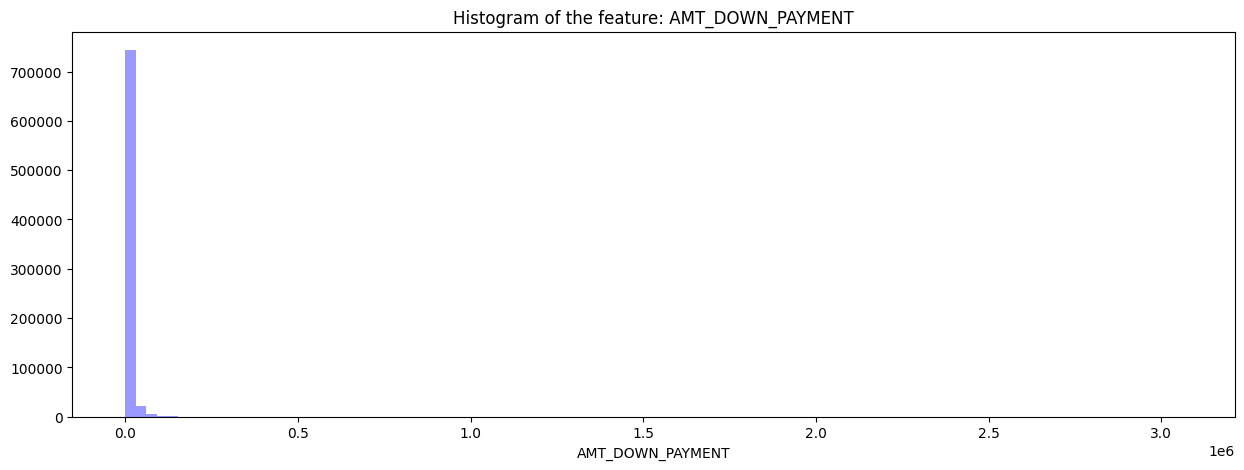

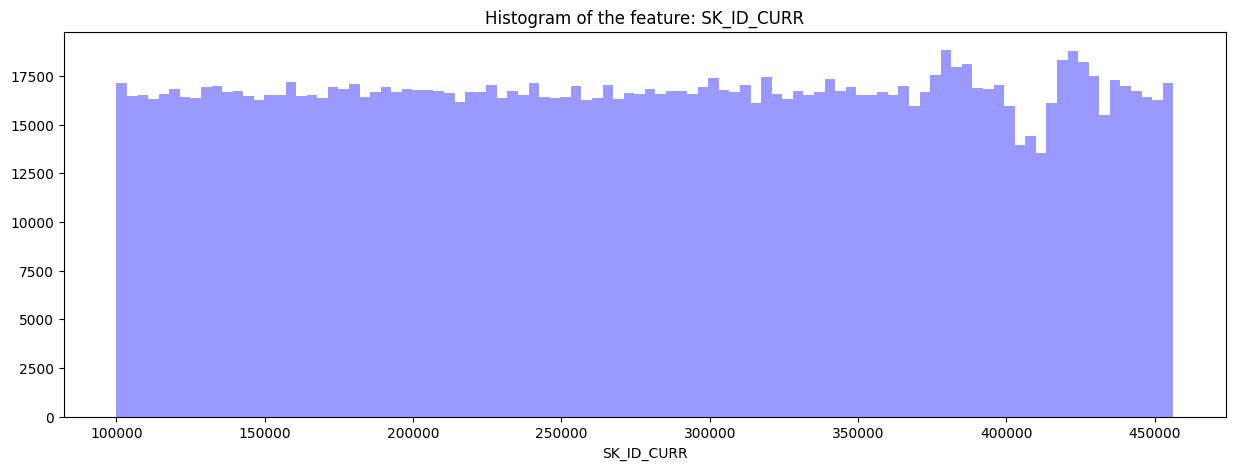

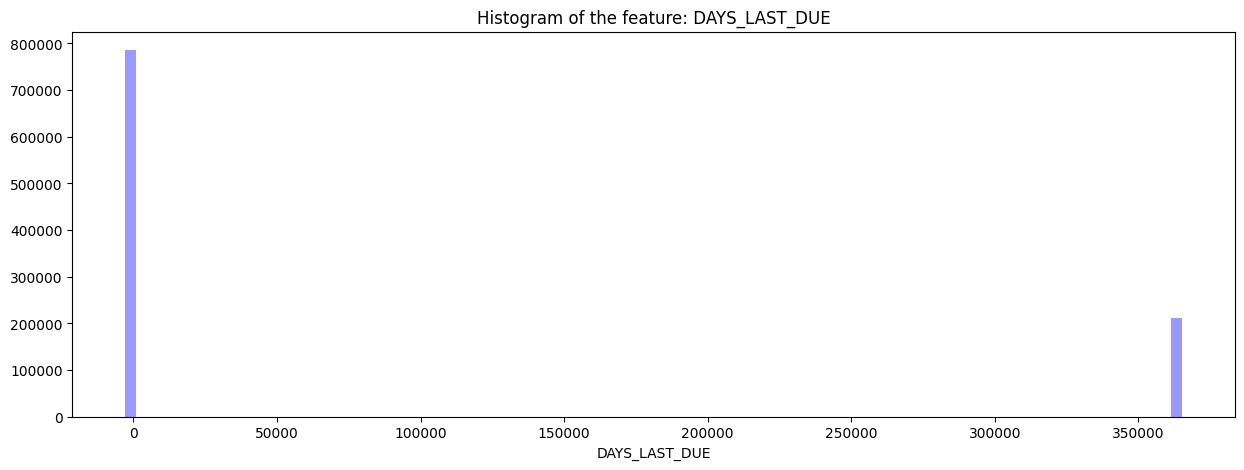

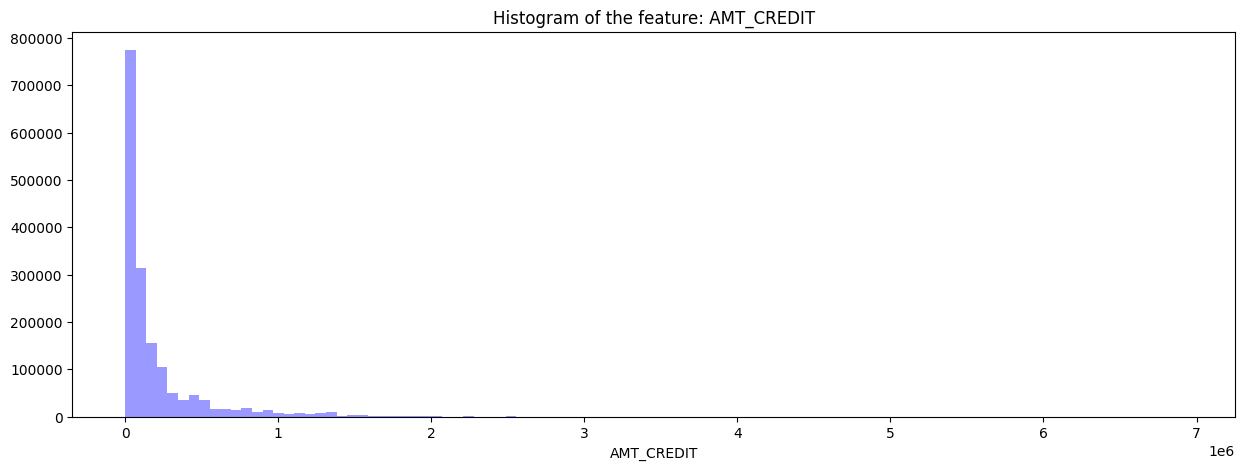

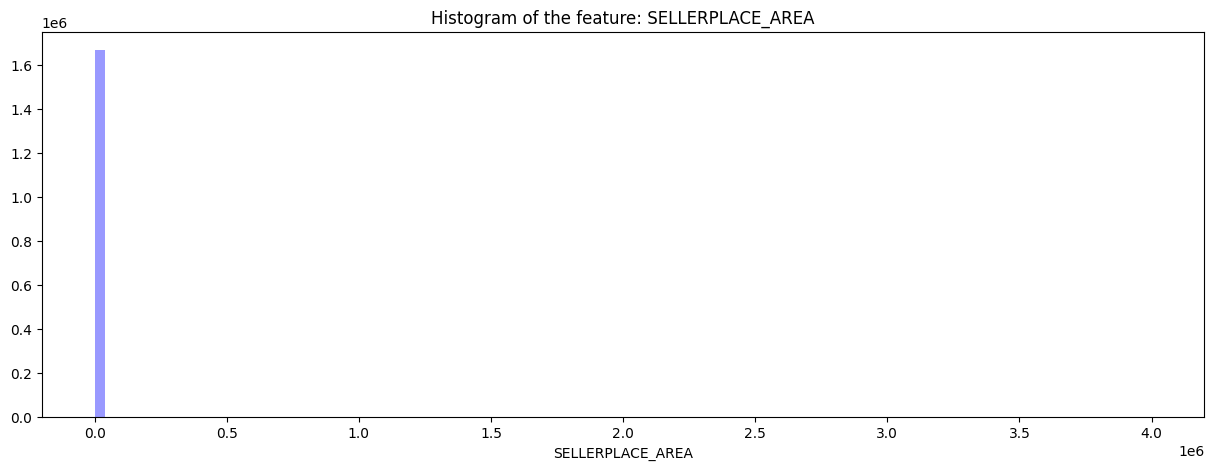

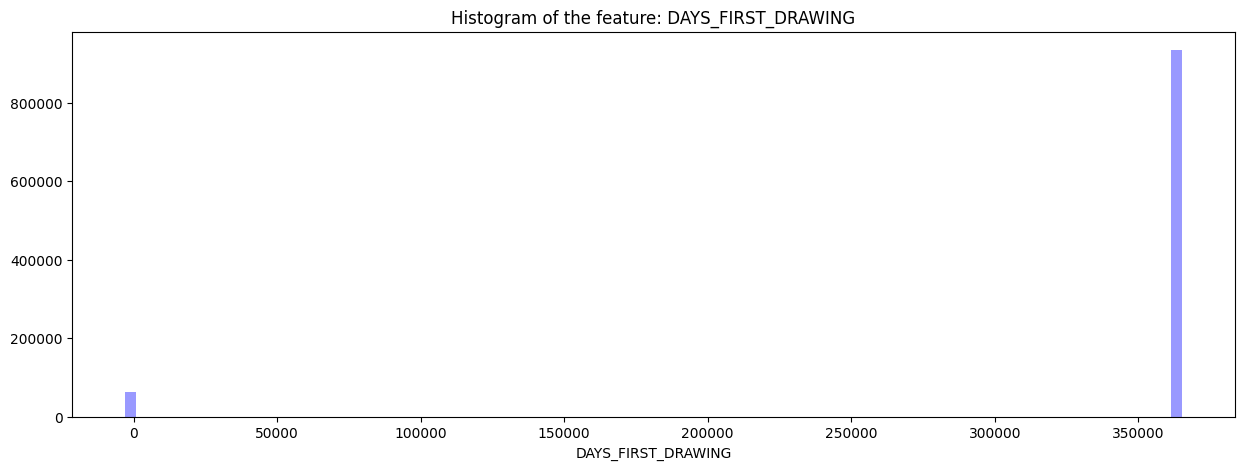

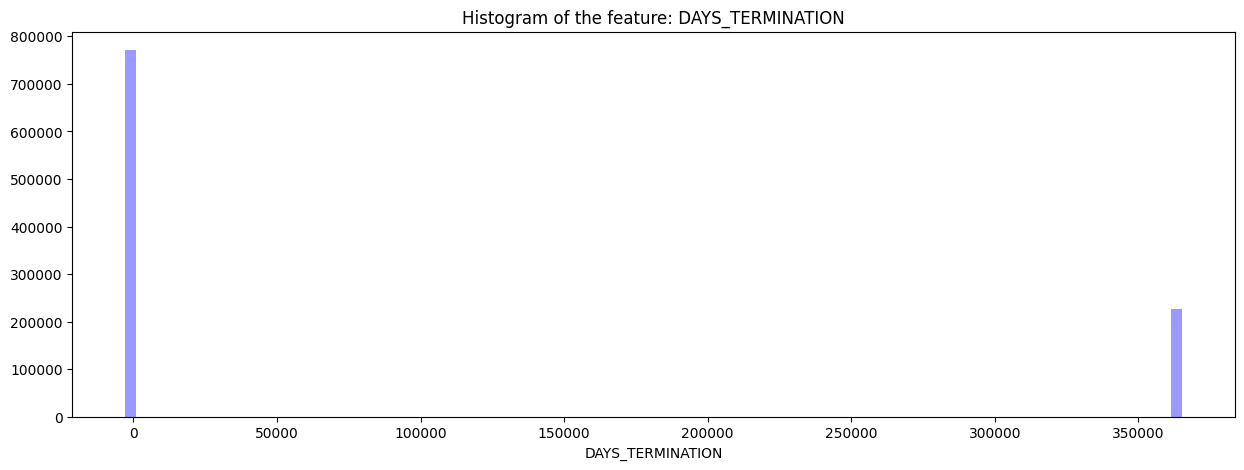

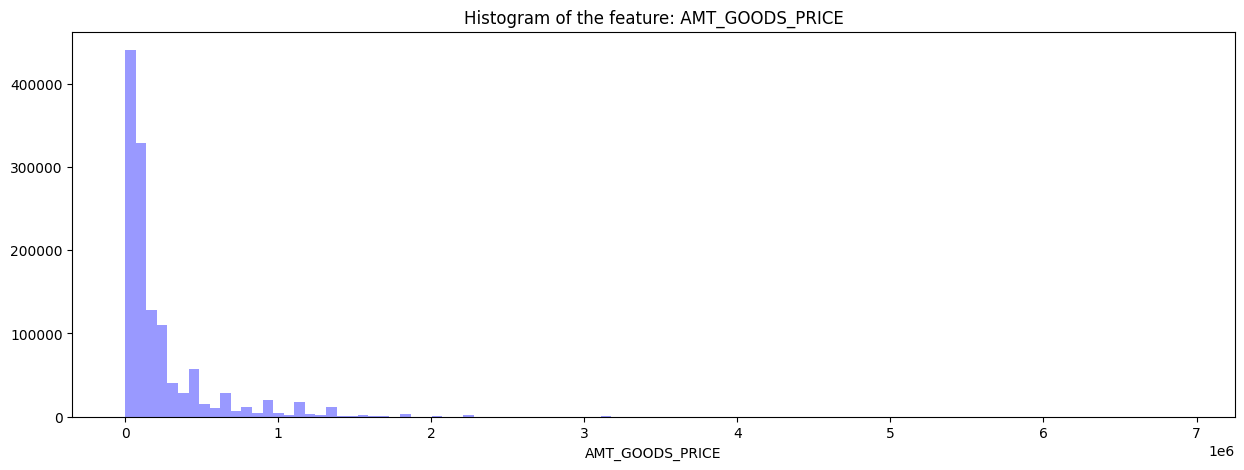

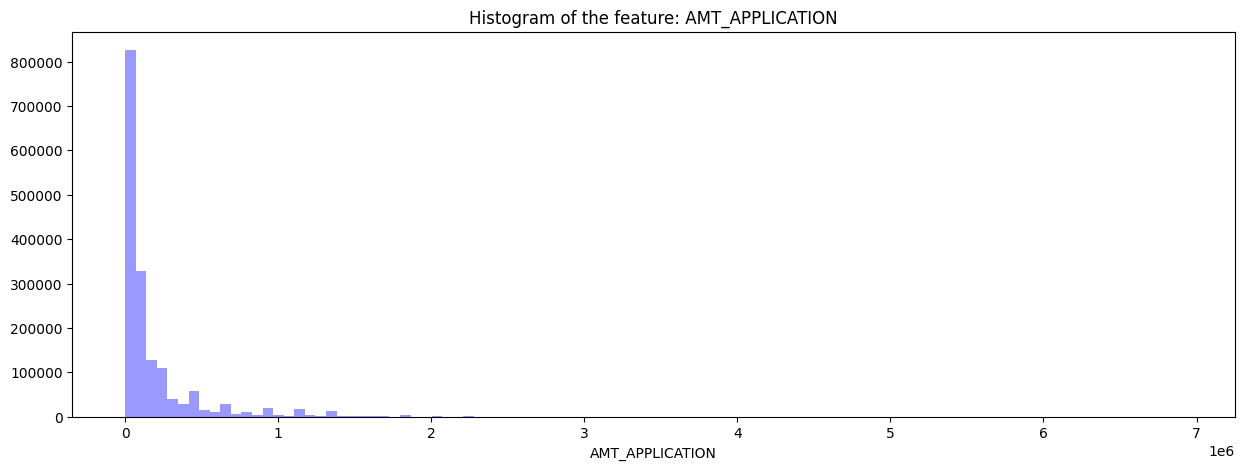

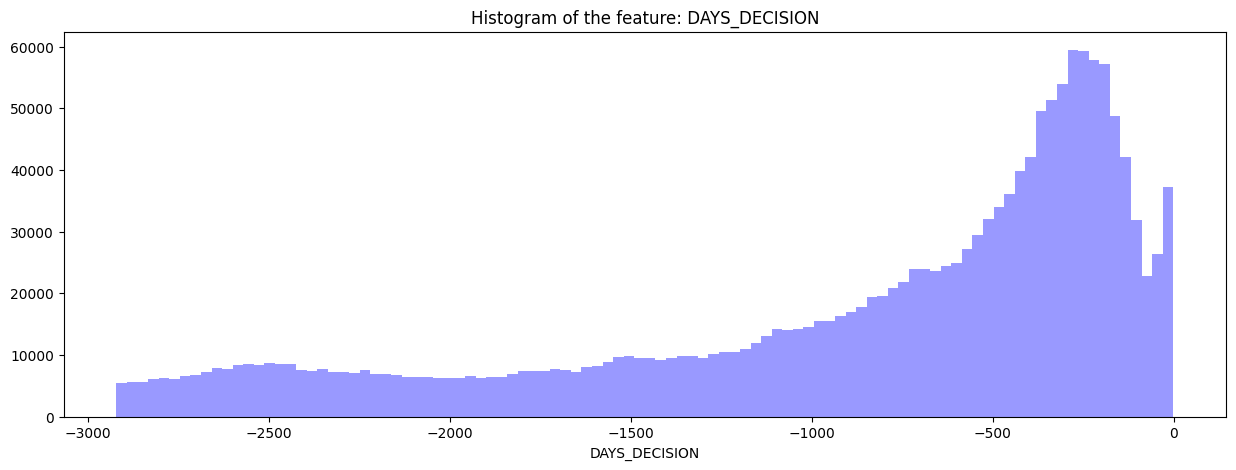

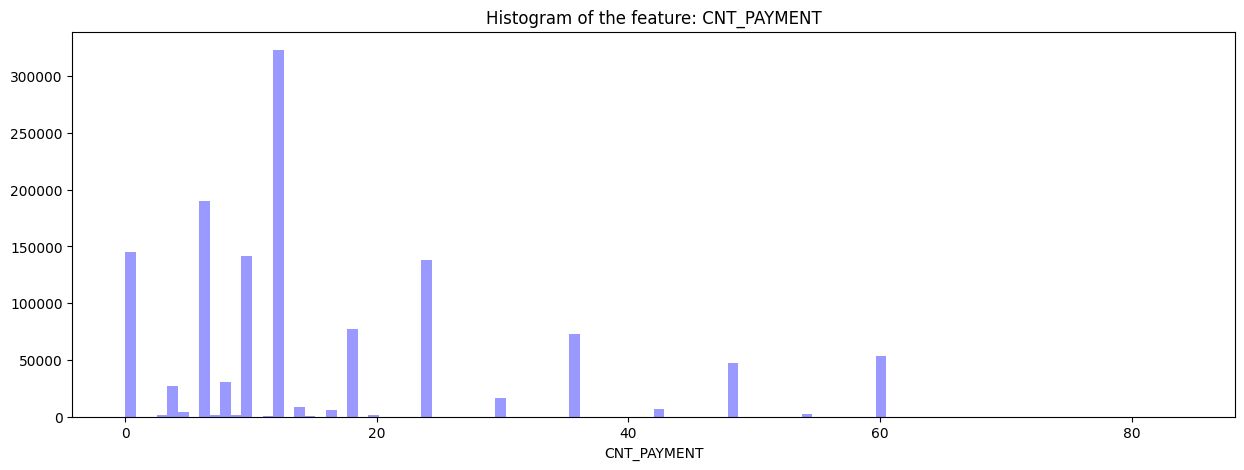

In [74]:
#Visualize all numerical features to see problems
for feature in numerical_feature:
    fig, ax = plt.subplots(figsize = (15, 5))
    sns.distplot(previous_application[feature].dropna(), kde = False, bins = 100, ax = ax, color = 'b')
    ax.set_title("Histogram of the feature: " + feature)

## Comment:
- A lot of outliers and high skewness in numerical features here
- Strange of data: **DAYS_FIRST_DRAWING**, **DAYS_FIRST_DUE**, **DAYS_LAST_DUE_1ST_VERSION**, **DAYS_LAST_DUE** and **DAY_TERMINATION**. These features all contain an amount of #days > 350000days = roughly 1000 years which is unrealistic 

**deal with rows that having values of these feature greater than 350000 (particularly 365243 will replace np.nan)**

### Check outlier of numerical variables

/var/folders/b0/n1lz5zk51z374mpb3hyxn5n00000gp/T/ipykernel_2153/2834318282.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize = (11,7))


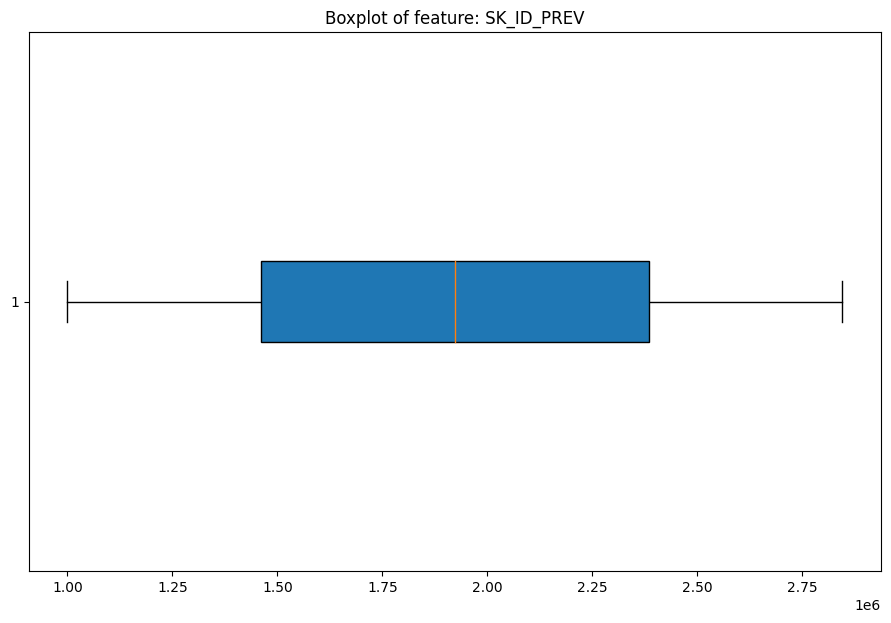

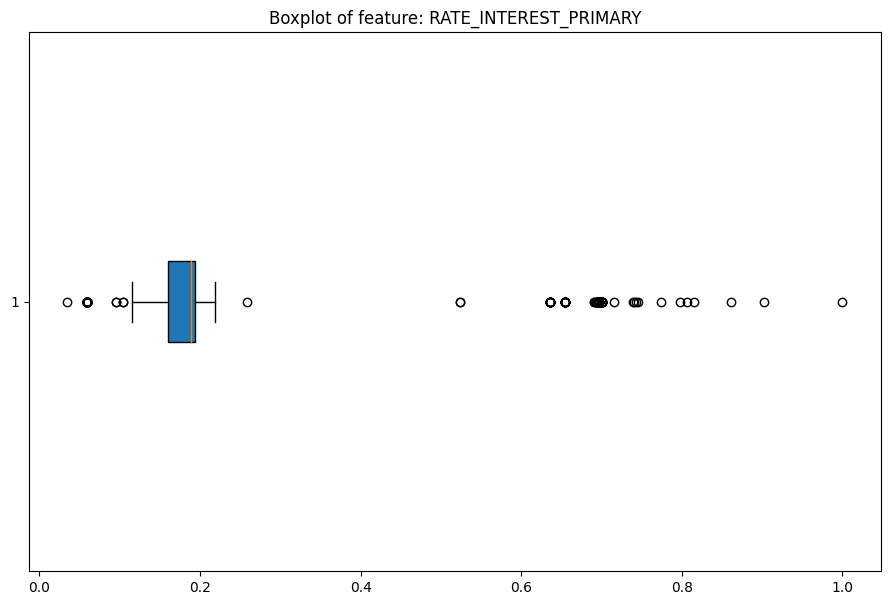

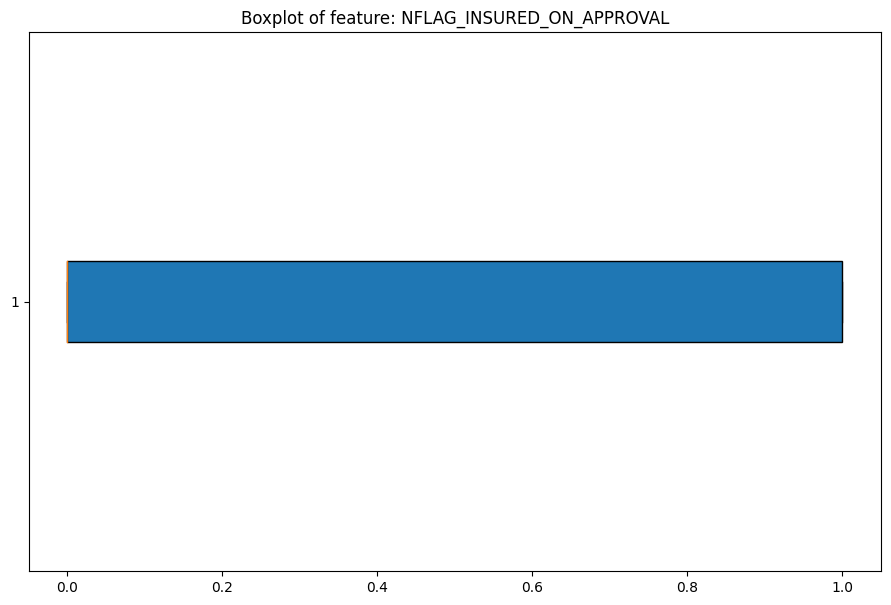

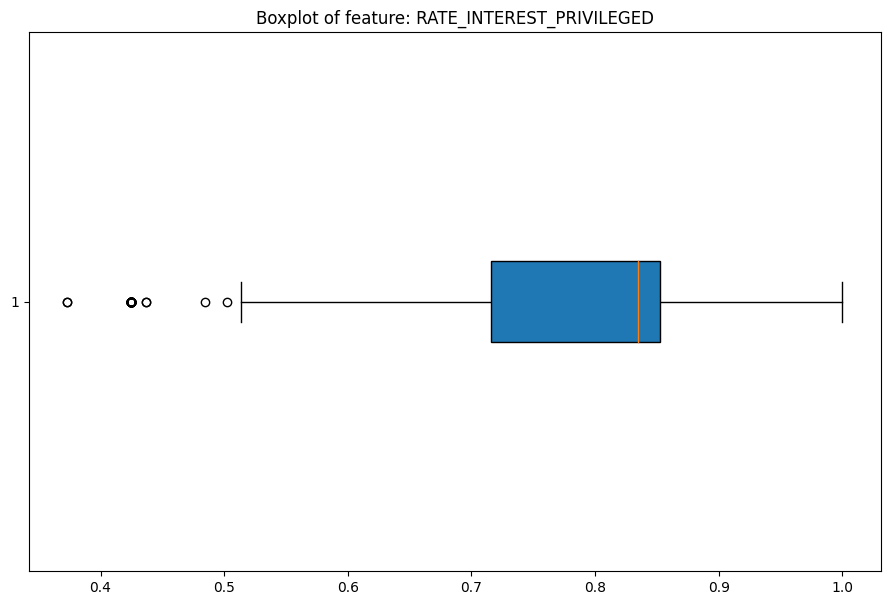

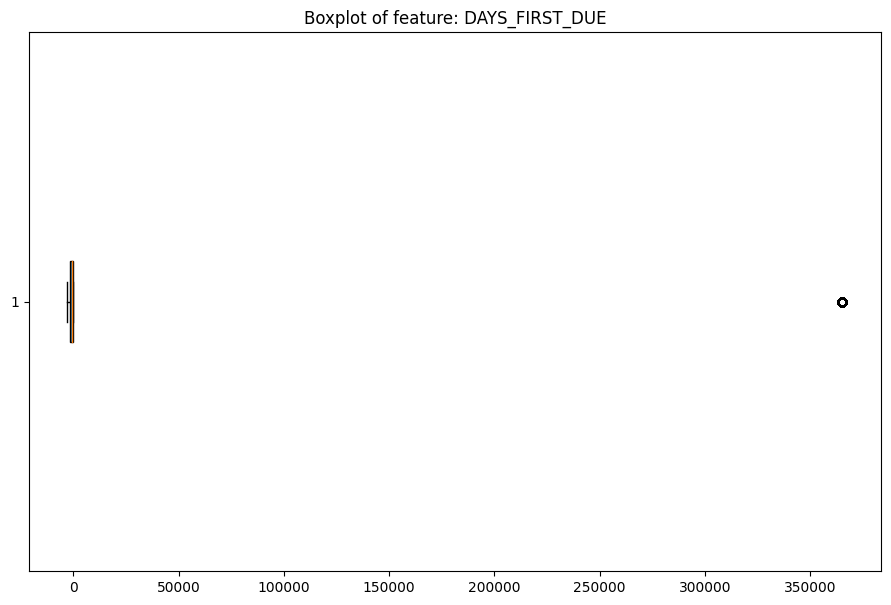

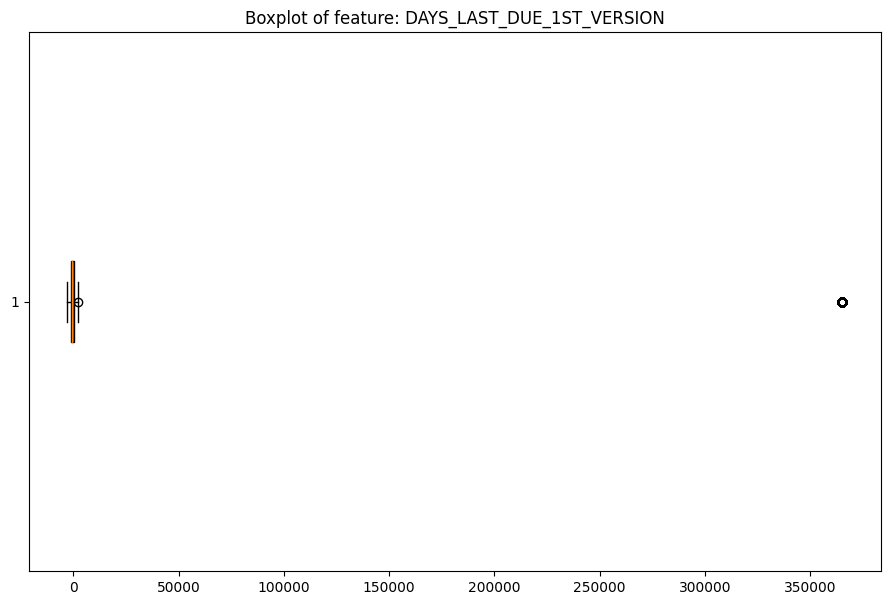

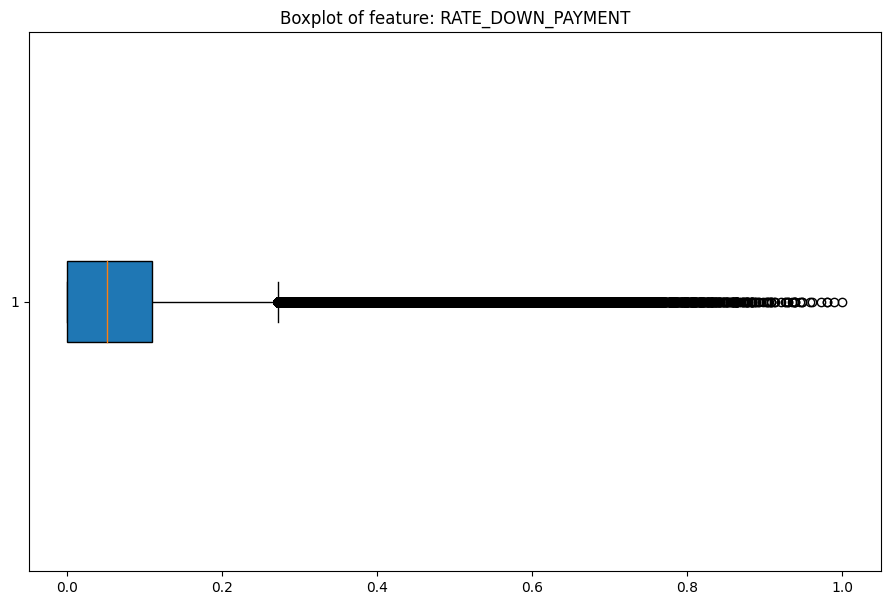

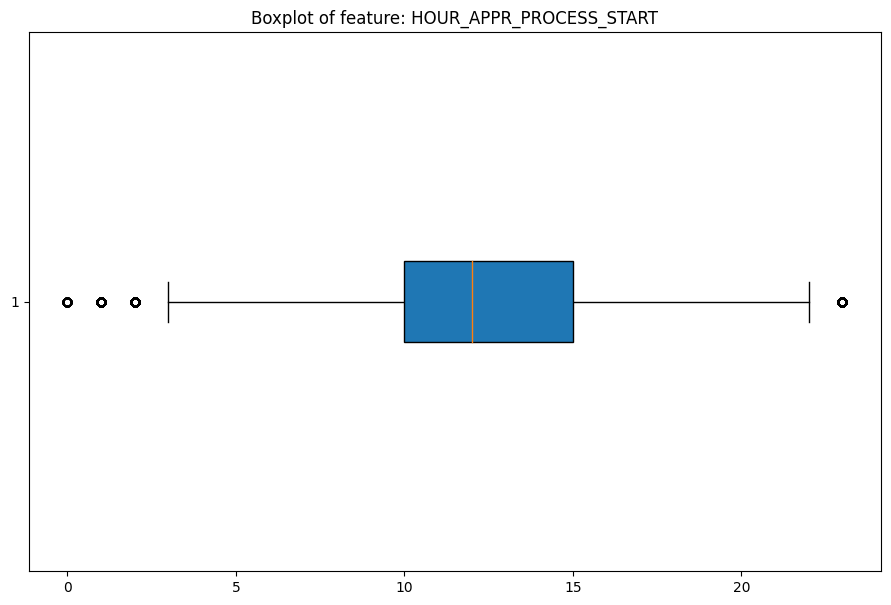

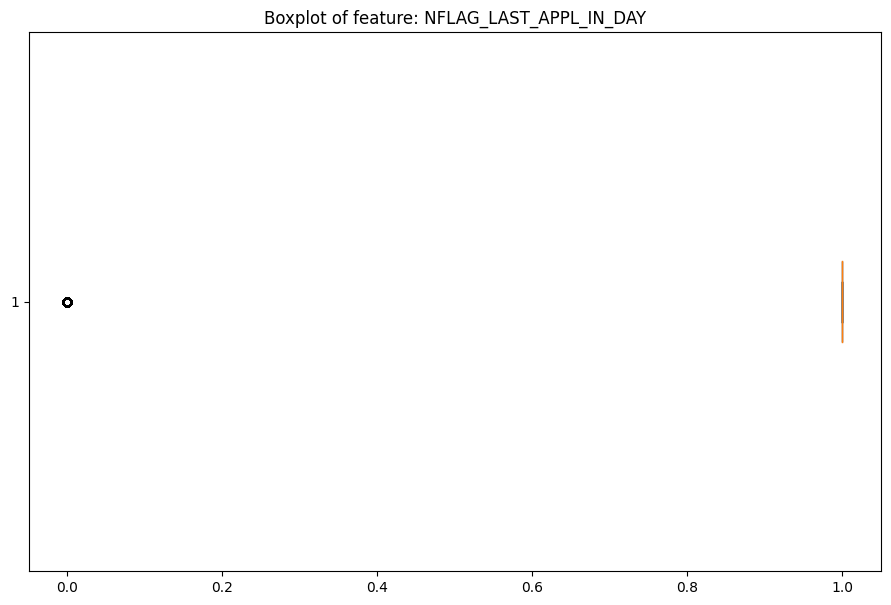

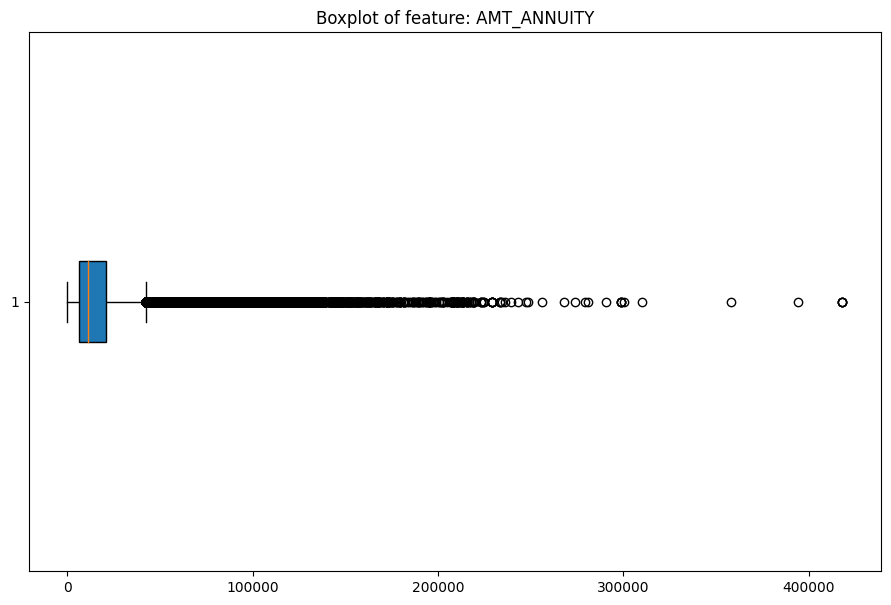

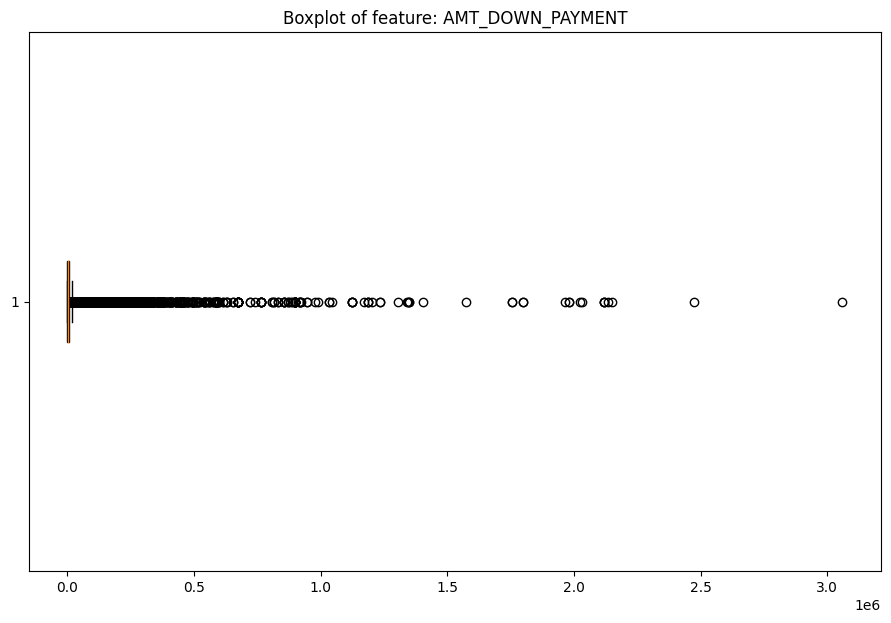

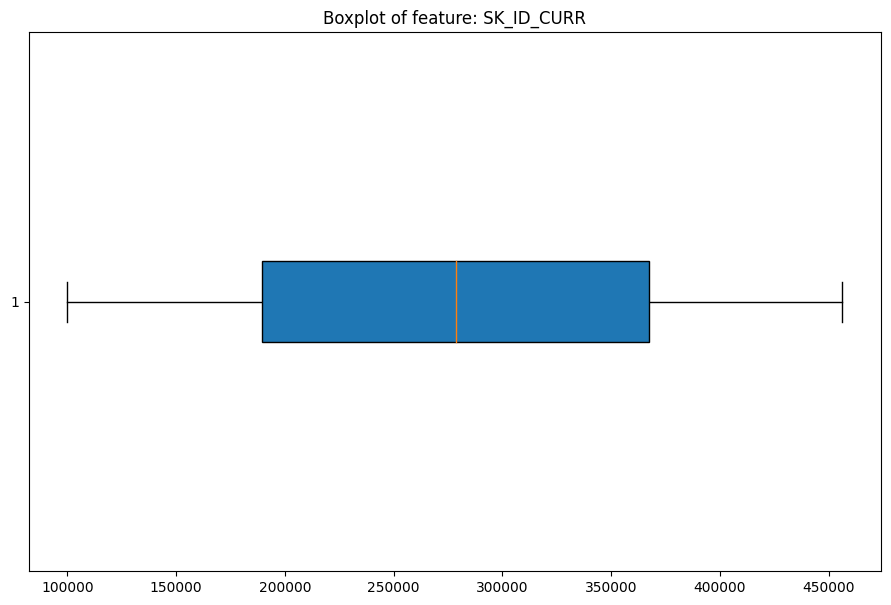

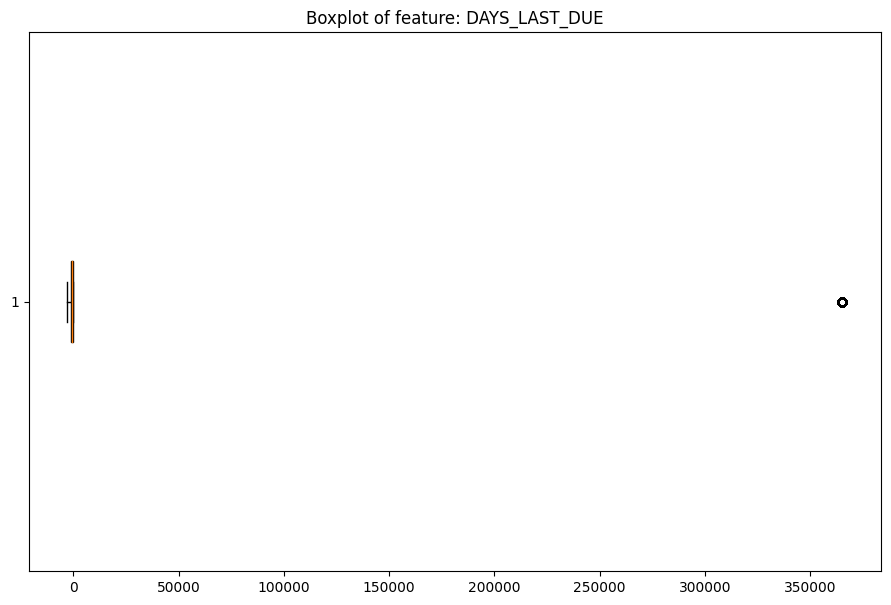

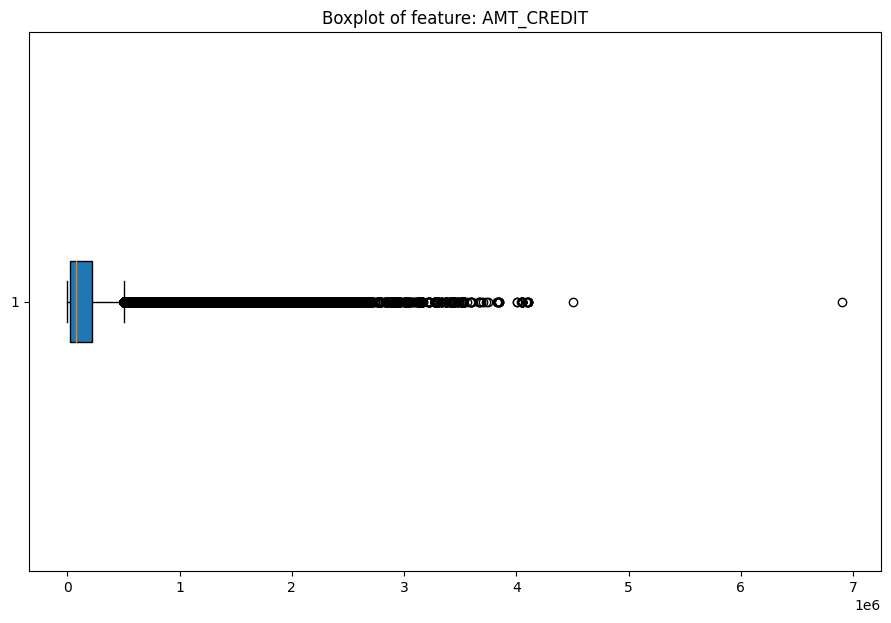

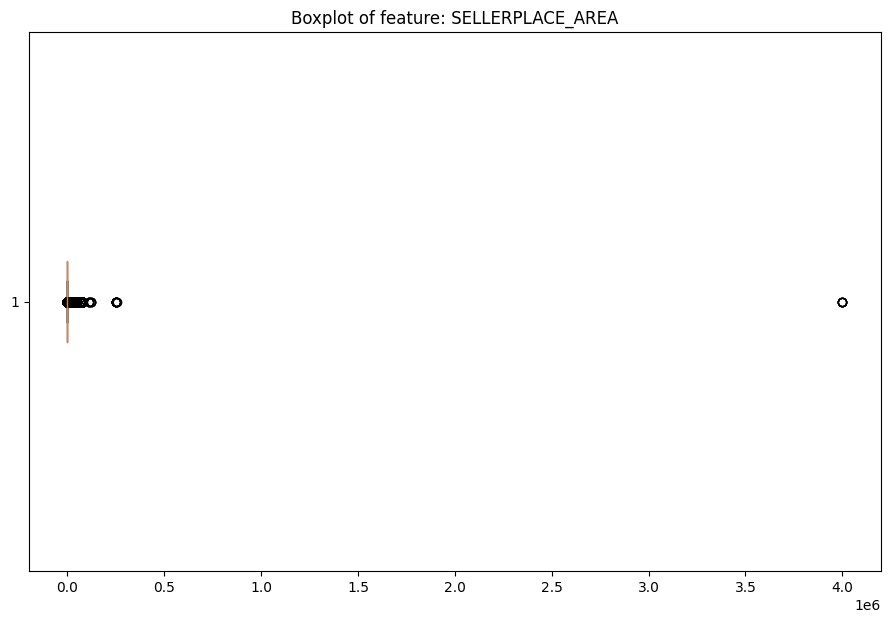

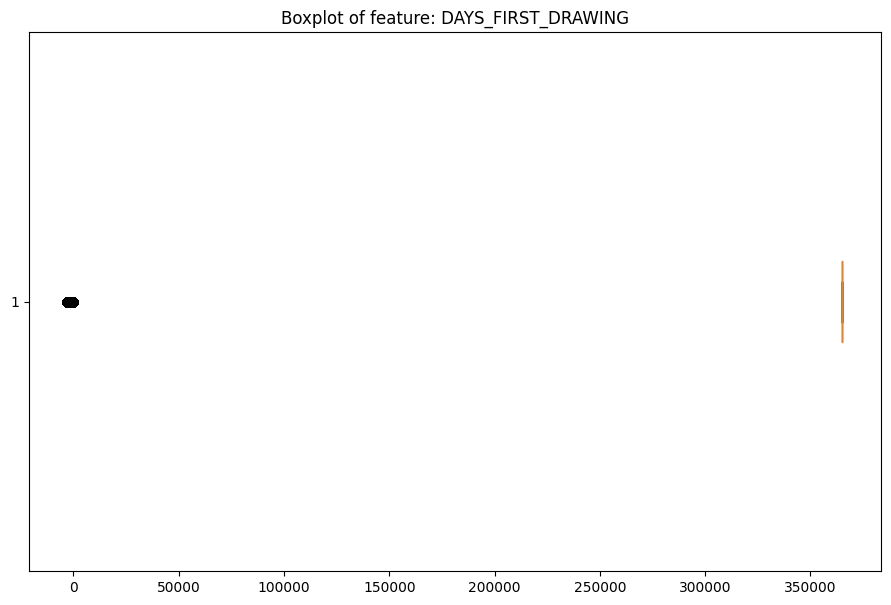

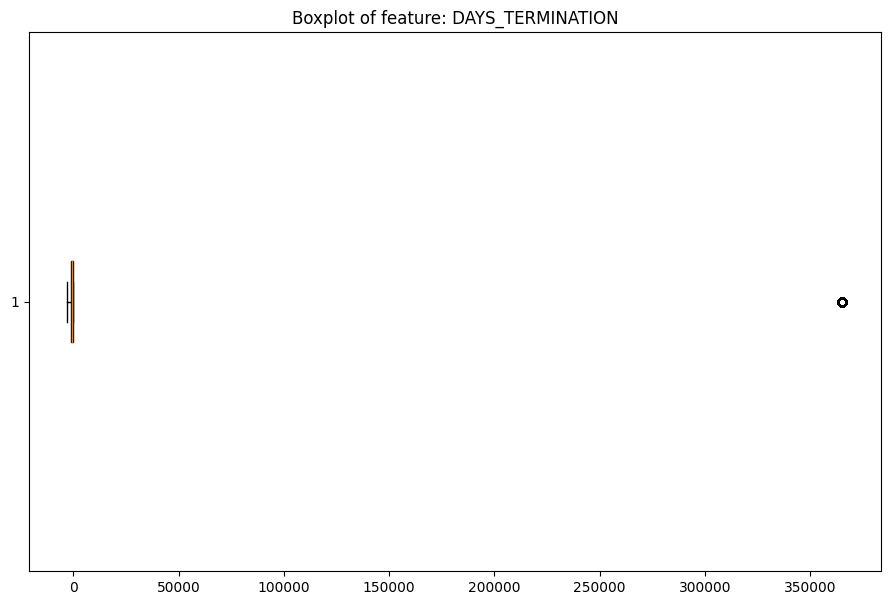

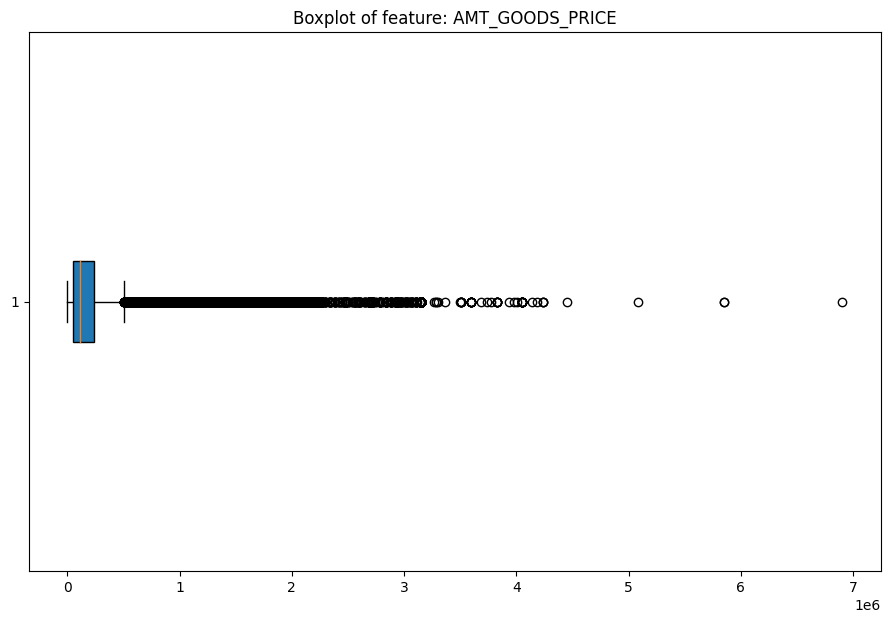

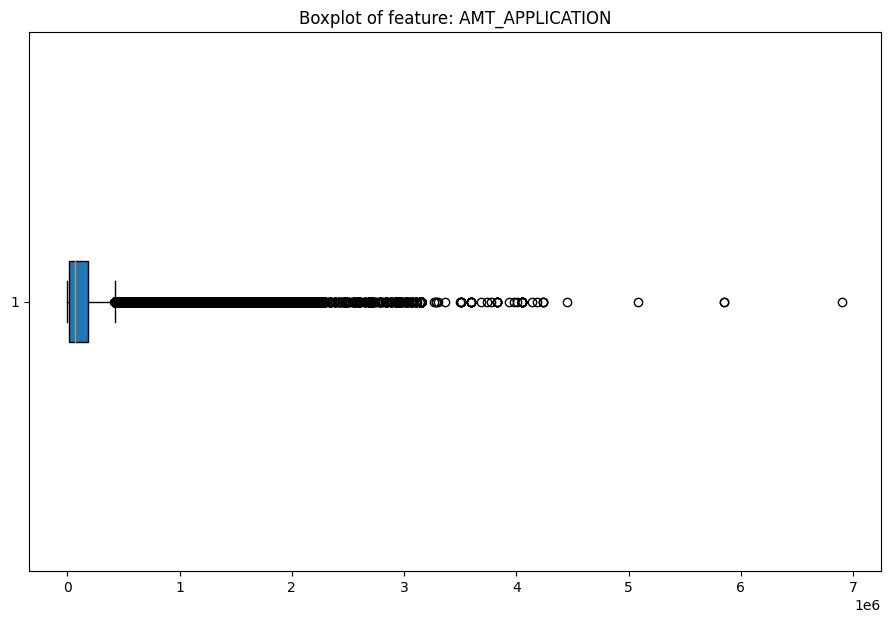

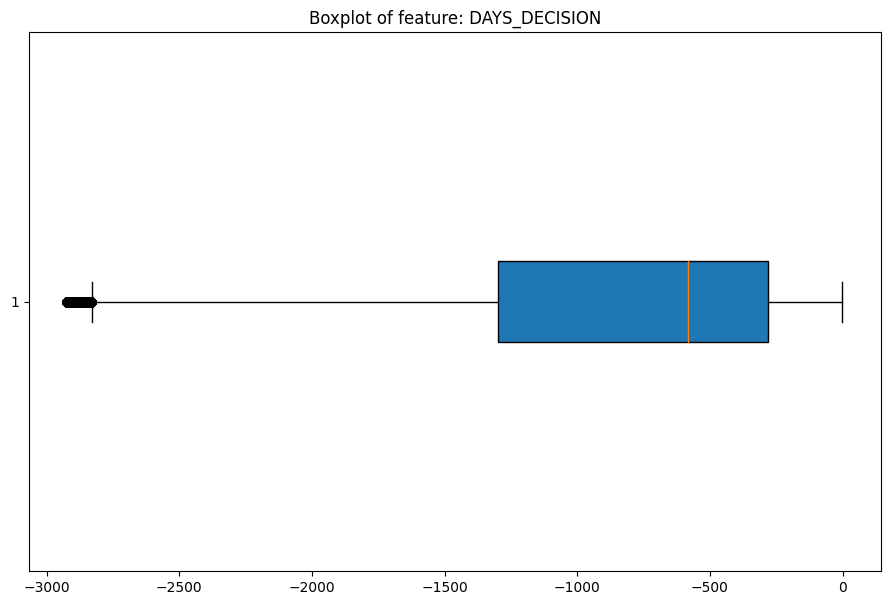

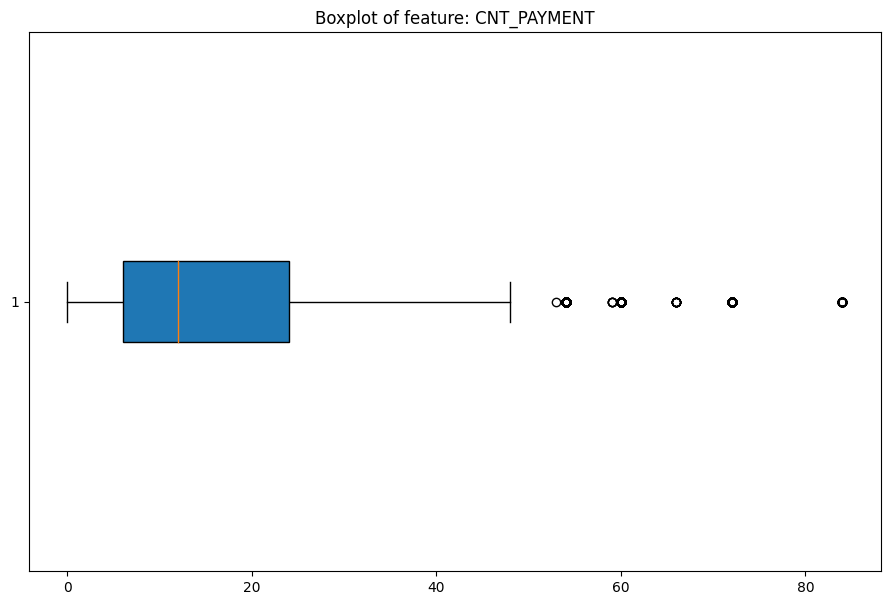

In [76]:
for feature in numerical_feature:
    fig, ax = plt.subplots(figsize = (11,7))
    plt.boxplot(previous_application[feature].dropna(), patch_artist = True, vert = False)
    ax.set_title('Boxplot of feature: ' + feature)

## Comment
- RATE_INTEREST_PRIMARY, RATE_INTEREST_PRIVILEGED, DAYS_FIRST_DUE, DAYS_LAST_DUE_1ST_VERSION, RATE_DOWN_PAYMENT, HOUR_APPR_PROCESS_START, AMT_ANNUITY, AMT_DOWN_PAYMENT, DAYS_LAST_DUE, AMT_CREDIT, SELLERPLACE_AREA, DAYS_FIRST_DRAWING, DAYS_TERMINATION, AMT_GOODS_PRICE, CNT_PAYMENT **have outlier**

### Heatmap to show correlation between numerical features

In [83]:
numerical_corr

,SK_ID_PREV,RATE_INTEREST_PRIMARY,NFLAG_INSURED_ON_APPROVAL,RATE_INTEREST_PRIVILEGED,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,RATE_DOWN_PAYMENT,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,AMT_ANNUITY,...,SK_ID_CURR,DAYS_LAST_DUE,AMT_CREDIT,SELLERPLACE_AREA,DAYS_FIRST_DRAWING,DAYS_TERMINATION,AMT_GOODS_PRICE,AMT_APPLICATION,DAYS_DECISION,CNT_PAYMENT
SK_ID_PREV,1.000000,0.012969,0.003986,-0.022312,-0.000071,0.001222,-0.004051,-0.002652,-0.002828,0.011459,...,-0.000321,0.001915,0.003659,-0.001079,-0.001478,0.001781,0.015293,0.003302,0.019100,0.015589
RATE_INTEREST_PRIMARY,0.012969,1.000000,0.311938,-0.001937,-0.017171,-0.000933,-0.103373,-0.027172,0.009604,0.141823,...,0.033197,-0.010677,0.125106,0.159182,NaN,-0.011099,0.110001,0.110001,0.014037,-0.019030
NFLAG_INSURED_ON_APPROVAL,0.003986,0.311938,1.000000,-0.067157,-0.119048,-0.221947,-0.021633,-0.117318,-0.007124,0.283080,...,0.000876,0.012560,0.263932,-0.018280,0.177652,-0.003065,0.243400,0.259219,-0.028905,0.320520
RATE_INTEREST_PRIVILEGED,-0.022312,-0.001937,-0.067157,1.000000,0.150904,0.030513,-0.106143,-0.045720,0.024640,-0.202335,...,-0.016757,0.372214,-0.205158,-0.066316,NaN,0.378671,-0.199733,-0.199733,0.631940,-0.057150
DAYS_FIRST_DUE,-0.000071,-0.017171,-0.119048,0.150904,1.000000,0.513949,-0.039178,-0.002797,-0.002288,-0.053295,...,-0.000757,0.401838,0.002881,-0.002166,0.004710,0.323608,-0.021062,-0.049532,0.176711,-0.204907
DAYS_LAST_DUE_1ST_VERSION,0.001222,-0.000933,-0.221947,0.030513,0.513949,1.000000,-0.010934,-0.016567,-0.001981,-0.068877,...,0.000252,0.423462,0.044031,-0.007510,-0.803494,0.493174,0.016883,-0.084905,0.089167,-0.381013
RATE_DOWN_PAYMENT,-0.004051,-0.103373,-0.021633,-0.106143,-0.039178,-0.010934,1.000000,0.025930,0.004554,-0.103878,...,0.001158,-0.147562,-0.188128,-0.006489,-0.007969,-0.145461,-0.072479,-0.072479,-0.208742,-0.278875
HOUR_APPR_PROCESS_START,-0.002652,-0.027172,-0.117318,-0.045720,-0.002797,-0.016567,0.025930,1.000000,0.005789,-0.036201,...,0.002842,-0.018018,-0.021039,0.015671,0.014321,-0.018254,-0.045267,-0.014415,-0.039962,-0.055511
NFLAG_LAST_APPL_IN_DAY,-0.002828,0.009604,-0.007124,0.024640,-0.002288,-0.001981,0.004554,0.005789,1.000000,0.020639,...,0.000098,-0.002277,-0.025179,0.000912,-0.000409,-0.000744,-0.017100,0.004310,0.016555,0.063347
AMT_ANNUITY,0.011459,0.141823,0.283080,-0.202335,-0.053295,-0.068877,-0.103878,-0.036201,0.020639,1.000000,...,0.000577,0.082659,0.816429,-0.015027,0.052839,0.068022,0.820895,0.808872,0.279051,0.394535


/var/folders/b0/n1lz5zk51z374mpb3hyxn5n00000gp/T/ipykernel_2153/1873527157.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(numerical_corr, dtype=np.bool)


Text(0.5, 1.0, 'Correlation plot between numerical features')

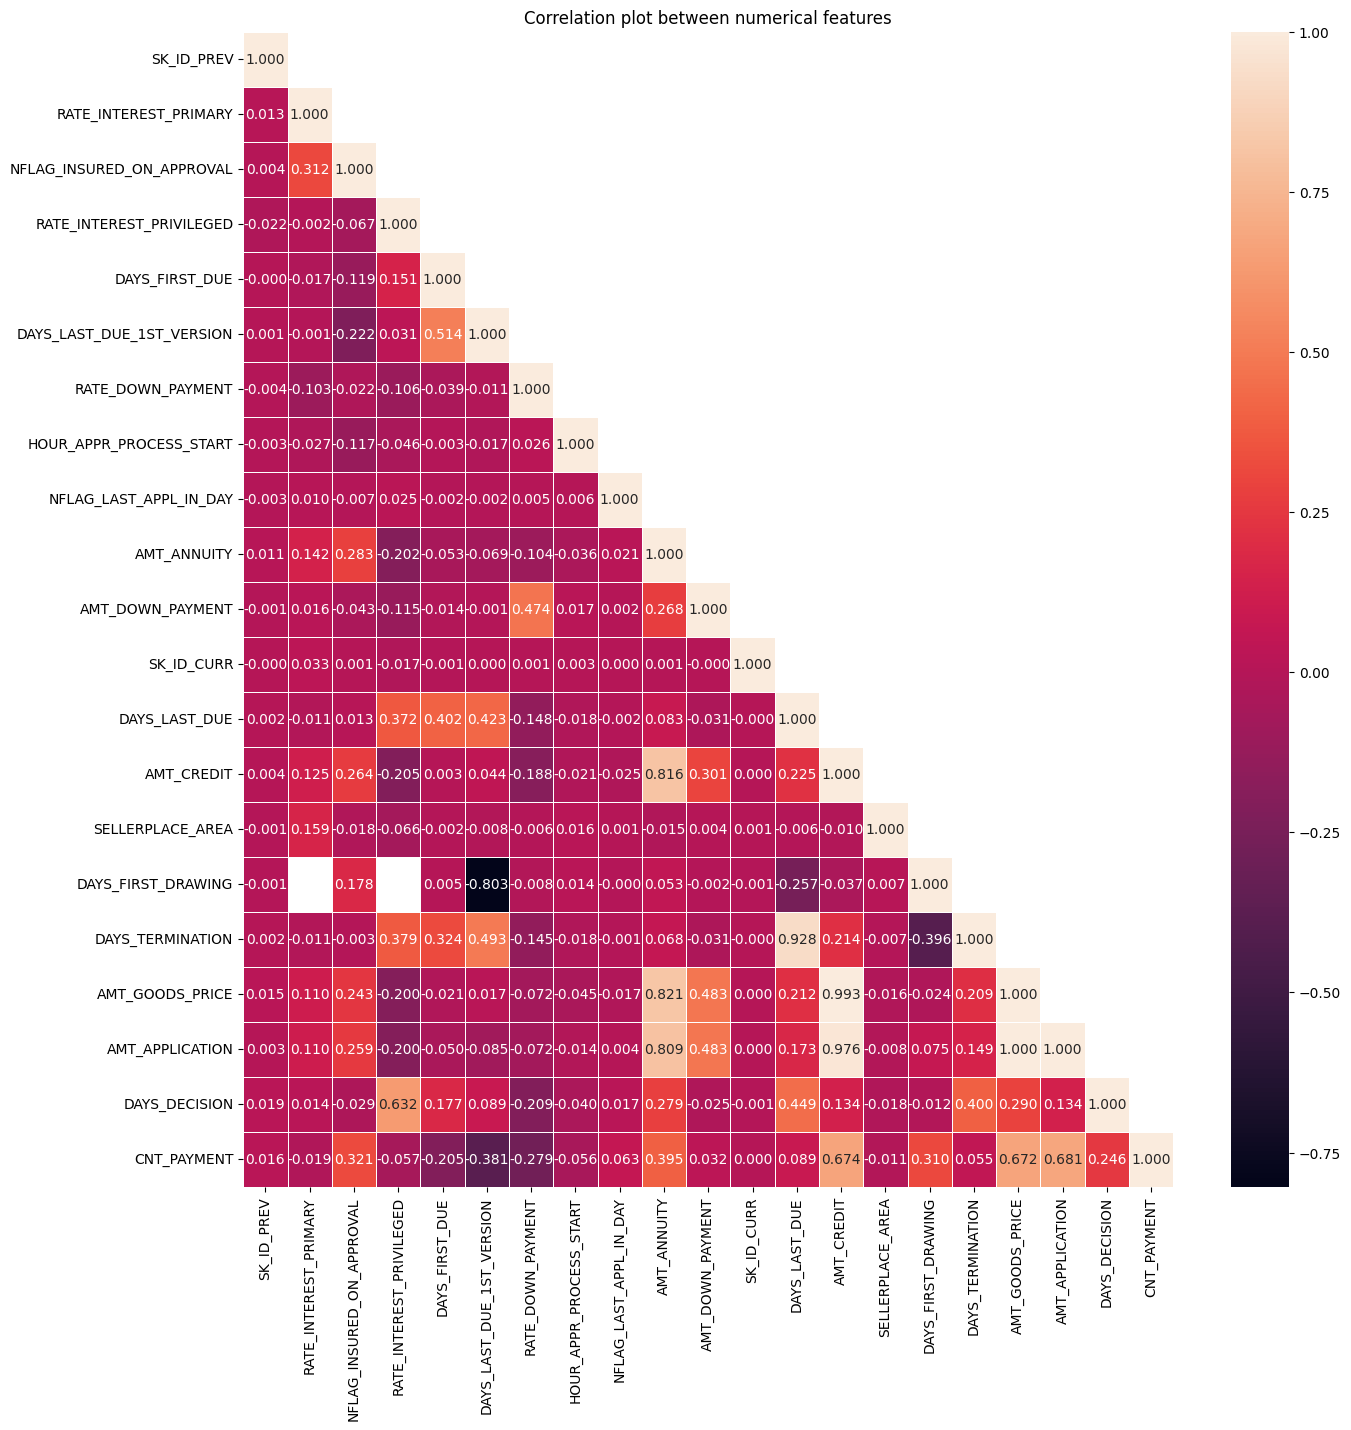

In [84]:
numerical_corr = numerical_feature_df.corr()
plt.figure(figsize=(15,15))
mask = np.zeros_like(numerical_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False
sns.heatmap(numerical_corr,mask= mask, annot= True, fmt=".3f", linewidth=.5)
plt.title("Correlation plot between numerical features")

## Comment:
- **DAYS_LAST_DUE** and **DAYS_TERMINATION**
- **DAYS_FIRST_DRAWING** and **DAYS_LAST_DUE_1ST_VERSION**
- **AMT_GOODS_PRICE**  and **AMT_APPLICATION** (1)
- **AMT_CREDIT** and **AMT_APPLICATION**
-  **AMT_GOODS_PRICE** and  **AMT_CREDIT**
- some other features are highly correlated, either positively or negatively 

are highly correlated

**we will remove these feature to prevent collinearity**

# DATA CLEANING 

### DROP COLUMNS WITH PERCENTAGE OF MISSING VALUE > 90%

In [87]:

previous_application.drop(['RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED'], inplace = True, axis = 1)

#UPDATE: 1670214 rows × 35 columns

### DROP Columns with highly correlation (> |0.9|)
- DAYS_TERMINATION and DAYS_LAST_DUE, delete feature **DAYS_TERMINATION** because it was the expected termination when applying, while DAYS_LAST_DUE was the last due date, which would definitely happen.
- AMT_APPLICATION and AMT_GOODS_PRICE, both features AMT_APPLICATION and AMT_GOODS_PRICE are duplicated, however, **AMT_GOODS_PRICE** had more missing values, so we can choose to delete this feature
- AMT_APPLICATION and AMT_CREDIT, delete feature **AMT_APPLICATION** because Final credit amount on the previous application differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount, in fact, final credit was the one which was finally saved
- AMT_GOODS_PRICE and AMT_CREDIT, delete feature **AMT_GOODS_PRICE** because Goods price of good that client asked for is unnecessary, compared with Final credit amount on the previous application, which is more neccesary


In [92]:
previous_application.drop(['DAYS_TERMINATION', 'AMT_GOODS_PRICE','AMT_APPLICATION'], inplace = True, axis = 1)

#### DAYS_FEATURE has values in row > 350000

In [95]:


previous_application['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace=True)
previous_application['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace=True)
previous_application['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace=True)
previous_application['DAYS_LAST_DUE'].replace(365243, np.nan, inplace=True)
#previous_application['DAYS_TERMINATION'].replace(365243, np.nan, inplace=True) #delete above

In [100]:
missing_data(previous_application)

,Total,Percent
DAYS_FIRST_DRAWING,1607509,96.245691
RATE_DOWN_PAYMENT,895844,53.636480
AMT_DOWN_PAYMENT,895844,53.636480
DAYS_LAST_DUE,884286,52.944473
NAME_TYPE_SUITE,820405,49.119754
DAYS_LAST_DUE_1ST_VERSION,766929,45.918008
DAYS_FIRST_DUE,713710,42.731650
NFLAG_INSURED_ON_APPROVAL,673065,40.298129
AMT_ANNUITY,372235,22.286665
CNT_PAYMENT,372230,22.286366


#### DROP DAYS_FIRST_DRAWING

In [108]:
previous_application.drop(['DAYS_FIRST_DRAWING'], inplace = True, axis = 1)

### Drop others


In [102]:
previous_application['FLAG_LAST_APPL_PER_CONTRACT'].value_counts()
# we see the big ammount of value "Y"

Y    1661739
N       8475
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64

In [103]:
previous_application['CODE_REJECT_REASON'].value_counts()

# we see the big ammount of value "XAP"

XAP       1353093
HC         175231
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5244
VERIF        3535
SYSTEM        717
Name: CODE_REJECT_REASON, dtype: int64

In [105]:
previous_application['NAME_CASH_LOAN_PURPOSE'].value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

In [104]:
#Show the percentage of Y values in two columns 'SK_DPD', 'SK_DPD_DEF'
percent_Y = (previous_application[previous_application['FLAG_LAST_APPL_PER_CONTRACT'] == 'Y']['FLAG_LAST_APPL_PER_CONTRACT'].value_counts().sum()/previous_application.shape[0])* 100
print("Percentage of Y-value:", percent_Y)

#Show the percentage of XAP values in column 'CODE_REJECT_REASON'
percent_XAP = (previous_application[previous_application['CODE_REJECT_REASON'] == 'XAP']['CODE_REJECT_REASON'].value_counts().sum()/previous_application.shape[0])* 100
print("Percentage of XAP value:", percent_XAP)



Percentage of Y-value: 99.49257999274344
Percentage of XAP value: 81.01315160811728


In [107]:
#Show the percentage of XAP and XNA values in column 'NAME_CASH_LOAN_PURPOSE'
previous_application['NAME_CASH_LOAN_PURPOSE'].value_counts(normalize = True)


XAP                                 0.552421
XNA                                 0.405887
Repairs                             0.014229
Other                               0.009345
Urgent needs                        0.005036
Buying a used car                   0.001729
Building a house or an annex        0.001612
Everyday expenses                   0.001447
Medicine                            0.001302
Payments on other loans             0.001156
Education                           0.000942
Journey                             0.000742
Purchase of electronic equipment    0.000635
Buying a new car                    0.000606
Wedding / gift / holiday            0.000576
Buying a home                       0.000518
Car repairs                         0.000477
Furniture                           0.000448
Buying a holiday home / land        0.000319
Business development                0.000255
Gasification / water supply         0.000180
Buying a garage                     0.000081
Hobby     

### drop features:
- FLAG_LAST_APPL_PER_CONTRACT, Y takes most of this feature (99.49%)<br>
- CODE_REJECT_REASON, XAP takes most of this feature (81.01%); moreover, those reasons in this feature are not explained well<br>
- NAME_CASH_LOAN_PURPOSE, it has too many XAP (55.24%), XNA (40.58%) values, these values take totally around 96% of this feature


In [109]:
previous_application.drop(['FLAG_LAST_APPL_PER_CONTRACT', 'CODE_REJECT_REASON', 'NAME_CASH_LOAN_PURPOSE'], inplace=True, axis=1)

In [110]:
previous_application

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_CREDIT,AMT_DOWN_PAYMENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,0.0,SATURDAY,15,1,0.000000,...,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,-42.0,300.0,-42.0,0.0
1,2802425,108129,Cash loans,25188.615,679671.0,NaN,THURSDAY,11,1,NaN,...,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,-134.0,916.0,NaN,1.0
2,2523466,122040,Cash loans,15060.735,136444.5,NaN,TUESDAY,11,1,NaN,...,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,-271.0,59.0,NaN,1.0
3,2819243,176158,Cash loans,47041.335,470790.0,NaN,MONDAY,7,1,NaN,...,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,-482.0,-152.0,-182.0,1.0
4,1784265,202054,Cash loans,31924.395,404055.0,NaN,THURSDAY,9,1,NaN,...,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,311400.0,0.0,WEDNESDAY,12,1,0.000000,...,Stone,43,Furniture,30.0,low_normal,POS industry with interest,-508.0,362.0,-358.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,64291.5,29250.0,TUESDAY,15,1,0.340554,...,Stone,43,Furniture,12.0,middle,POS industry with interest,-1604.0,-1274.0,-1304.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,102523.5,10525.5,MONDAY,12,1,0.101401,...,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest,-1457.0,-1187.0,-1187.0,0.0
1670212,2785582,400317,Cash loans,18821.520,191880.0,NaN,WEDNESDAY,9,1,NaN,...,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low,-1155.0,-825.0,-825.0,1.0


In [111]:
previous_application.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [98]:
""" DROP columns: 
DAYS_TERMINATION
AMT_GOODS_PRICE
AMT_APPLICATION
RATE_INTEREST_PRIMARY
RATE_INTEREST_PRIVILEDGED
FLAG_LAST_APPL_PER_CONTRACT
CODE_REJECT_REASON
NAME_CASH_LOAN_PURPOSE
DAYS_FIRST_DRAWING

(replace row value > 350000)
"""

# Update: 1670214 rows × 28 columns

' DROP columns: \nDAYS_TERMINATION\nAMT_GOODS_PRICE\nAMT_APPLICATION\nRATE_INTEREST_PRIMARY\nRATE_INTEREST_PRIVILEDGED\n\n'

#

# END

# Ý nghĩa của các biến trong ngữ cảnh default / non-default

In [28]:
application_train = reduce_memory_usage(pd.read_csv('application_train.csv'))
application_train.head(10)

Memmory usage of dataframe is 286.23 MB
Memory usage after optimization is 285.05 MB
Decreased by 0.4%


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
application_train.shape

(307511, 122)

In [30]:
previous_merge_train = application_train[['SK_ID_CURR', 'TARGET']].merge(previous_application, on = 'SK_ID_CURR', how = 'left')

In [31]:
previous_merge_train.head(10)

,SK_ID_CURR,TARGET,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,1038818.0,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,1810518.0,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,2636178.0,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,2396755.0,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,1564014.0,Consumer loans,5357.250,24282.0,20106.0,4860.0,24282.0,FRIDAY,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
5,100006,0,2078043.0,Cash loans,24246.000,675000.0,675000.0,NaN,675000.0,THURSDAY,...,XNA,48.0,low_normal,Cash X-Sell: low,365243.0,-151.0,1259.0,-151.0,-143.0,0.0
6,100006,0,2827850.0,Revolving loans,NaN,0.0,0.0,NaN,NaN,THURSDAY,...,XNA,NaN,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
7,100006,0,2190416.0,Consumer loans,29027.520,334917.0,267930.0,66987.0,334917.0,SUNDAY,...,Consumer electronics,12.0,high,POS household with interest,365243.0,-281.0,49.0,365243.0,365243.0,0.0
8,100006,0,1489396.0,Revolving loans,13500.000,270000.0,270000.0,NaN,270000.0,THURSDAY,...,XNA,0.0,XNA,Card X-Sell,365243.0,365243.0,365243.0,365243.0,365243.0,0.0
9,100006,0,1020698.0,Cash loans,39954.510,454500.0,481495.5,NaN,454500.0,SATURDAY,...,XNA,18.0,high,Cash X-Sell: high,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
previous_merge_train.shape

(1430155, 38)

In [115]:
previous_merge_train.drop(['RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED'], inplace = True, axis = 1)

In [116]:
previous_merge_train.shape

(1430155, 36)

<AxesSubplot:>

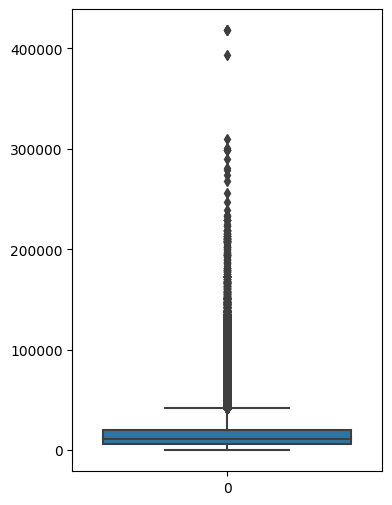

In [119]:
plt.figure(figsize=(4,6))
sns.boxplot(previous_merge_train["AMT_ANNUITY"])

<AxesSubplot:>

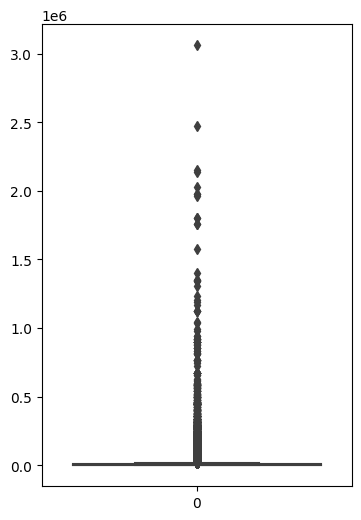

In [120]:
plt.figure(figsize=(4,6))
sns.boxplot(previous_merge_train["AMT_DOWN_PAYMENT"])

In [121]:
# bo outlier
previous_merge_train = previous_merge_train[previous_merge_train["AMT_ANNUITY"] < (np.nanpercentile(previous_merge_train["AMT_ANNUITY"], 99))]
previous_merge_train = previous_merge_train[previous_merge_train["AMT_DOWN_PAYMENT"] < np.nanpercentile(previous_merge_train["AMT_ANNUITY"], 99)]

<AxesSubplot:>

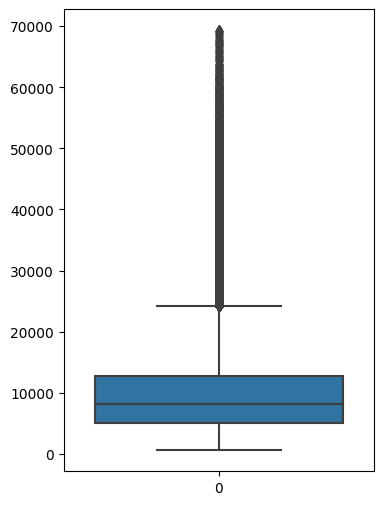

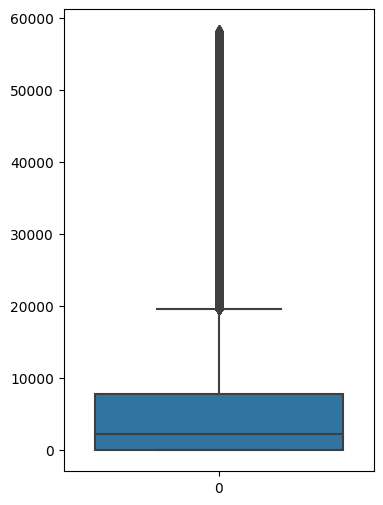

In [122]:
plt.figure(figsize=(4,6))
sns.boxplot(previous_merge_train["AMT_ANNUITY"])
plt.figure(figsize=(4,6))
sns.boxplot(previous_merge_train["AMT_DOWN_PAYMENT"])

In [127]:
import re
sns.set_theme()
import threading
threading.activeCount()

5

<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

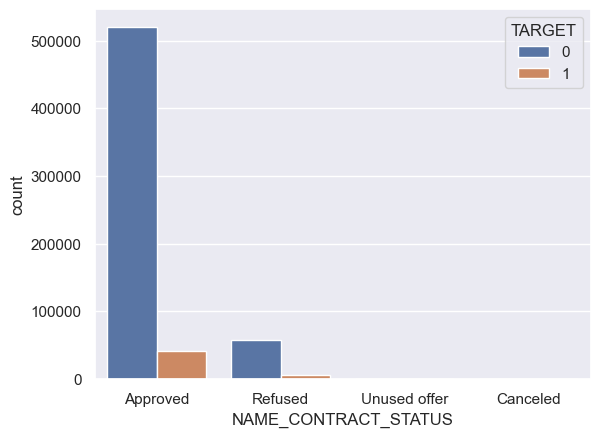

In [134]:
sns.countplot(data = previous_merge_train, x = "NAME_CONTRACT_STATUS", hue = 'TARGET')

In [138]:
total_approved = previous_merge_train[previous_merge_train["NAME_CONTRACT_STATUS"] == "Approved"].shape[0]
default_approved = previous_merge_train[(previous_merge_train["NAME_CONTRACT_STATUS"] == "Approved") & (previous_merge_train["TARGET"] == 1)].shape[0]

total_refused = previous_merge_train[previous_merge_train["NAME_CONTRACT_STATUS"] == "Refused"].shape[0]
nondefault_refused = previous_merge_train[(previous_merge_train["NAME_CONTRACT_STATUS"] == "Refused") & (previous_merge_train["TARGET"] == 0)].shape[0]

print(f"Tỉ lệ khách hàng là defaulter nhung có contract_status_prev = approved: {default_approved/total_approved * 100}")
print(f"Tỉ lệ khách hàng là non defaulter nhung có contract_status_prev = refused: {nondefault_refused/total_refused * 100}")

Tỉ lệ khách hàng là defaulter nhung có contract_status_prev = approved: 7.3567244377298255
Tỉ lệ khách hàng là non defaulter nhung có contract_status_prev = refused: 90.18635267939922


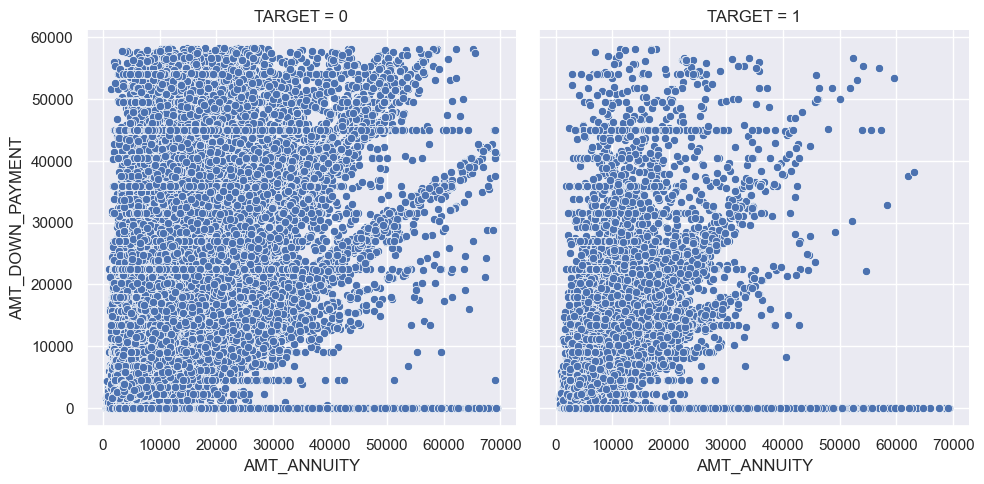

In [145]:


sns.relplot(data = previous_merge_train, x = 'AMT_ANNUITY', y = 'AMT_DOWN_PAYMENT', col = 'TARGET', kind = 'scatter')

#### Comment: 
- AMT_ANNUITY càng cao thì số defaulters càng giảm
- AMT_DOWN_PAYMENT càng cao thì defaulter càng giả


[Text(0.5, 1.0, 'Defaulter')]

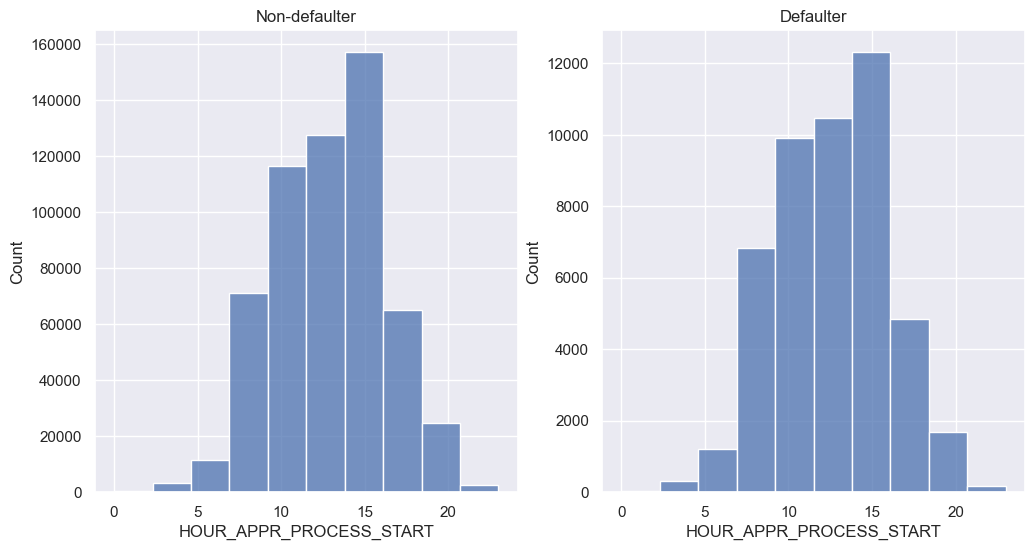

In [146]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.histplot(previous_merge_train[previous_merge_train["TARGET"] == 0]["HOUR_APPR_PROCESS_START"], ax= ax[0], bins=10).set(title = "Non-defaulter")
sns.histplot(previous_merge_train[previous_merge_train["TARGET"] == 1]["HOUR_APPR_PROCESS_START"], ax= ax[1], bins=10).set(title = "Defaulter")

#### Comment:
- không có sự khác nhau lắm giữa 1/0 --> feature có vẻ không ảnh hưởng đến target (may be bỏ)
- tập trung chủ yếu ở 15h rồi 10h


In [168]:
# #fig, ax = plt.subplots(1,2, figsize= (12,6))

# df1 = pd.DataFrame()
# df2 = pd.DataFrame()
# df1['non defaulter'] = previous_merge_train[previous_merge_train["TARGET"] == 0]["WEEKDAY_APPR_PROCESS_START"].sort_values()
# df2['defaulter']= previous_merge_train[previous_merge_train["TARGET"] == 1]["WEEKDAY_APPR_PROCESS_START"].sort_values()
# sns.countplot(df['non defaulter'], ax= ax[0]).set(title = "Non-defaulter")
# df = pd.concat([df1,df2])
# sns.countplot(df['defaulter'], ax= ax[1]).set(title = "Defaulter")


<AxesSubplot:xlabel='WEEKDAY_APPR_PROCESS_START', ylabel='count'>

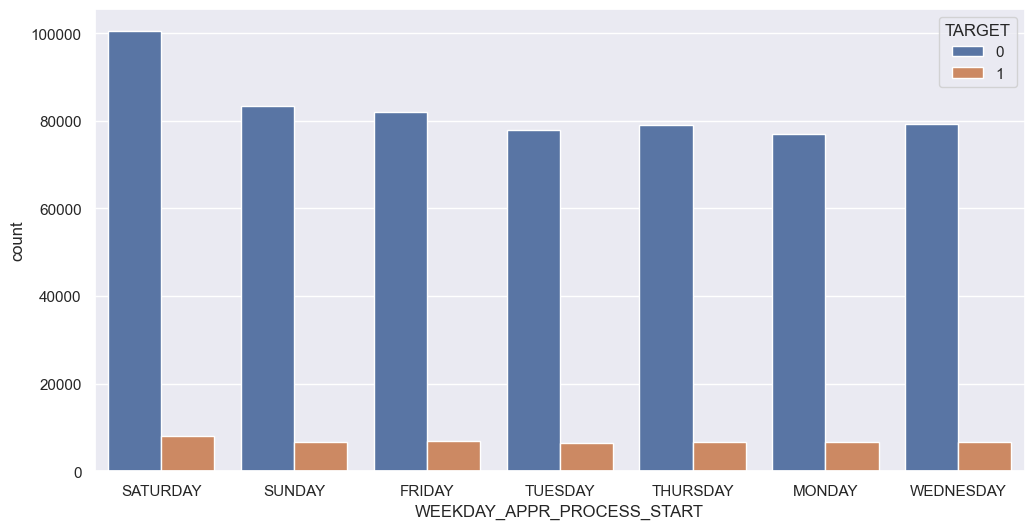

In [170]:
fig, ax = plt.subplots(figsize= (12,6))
sns.countplot(data = previous_merge_train, x = "WEEKDAY_APPR_PROCESS_START", hue = 'TARGET')

#### Comment:
- Trend: các khoản vay thường tập tủng vào cuối tuần, trend của cả 0/1 đều giống nhau --> feature này không ảnh hưởng đến target lắm

/var/folders/b0/n1lz5zk51z374mpb3hyxn5n00000gp/T/ipykernel_2153/4279670354.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(previous_merge_train[previous_merge_train["TARGET"] == 0]["DAYS_DECISION"].sort_values(), ax= ax[0]).set(title = "Non-defaulter")
/var/folders/b0/n1lz5zk51z374mpb3hyxn5n00000gp/T/ipykernel_2153/4279670354.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, plea

[Text(0.5, 1.0, 'Defaulter')]

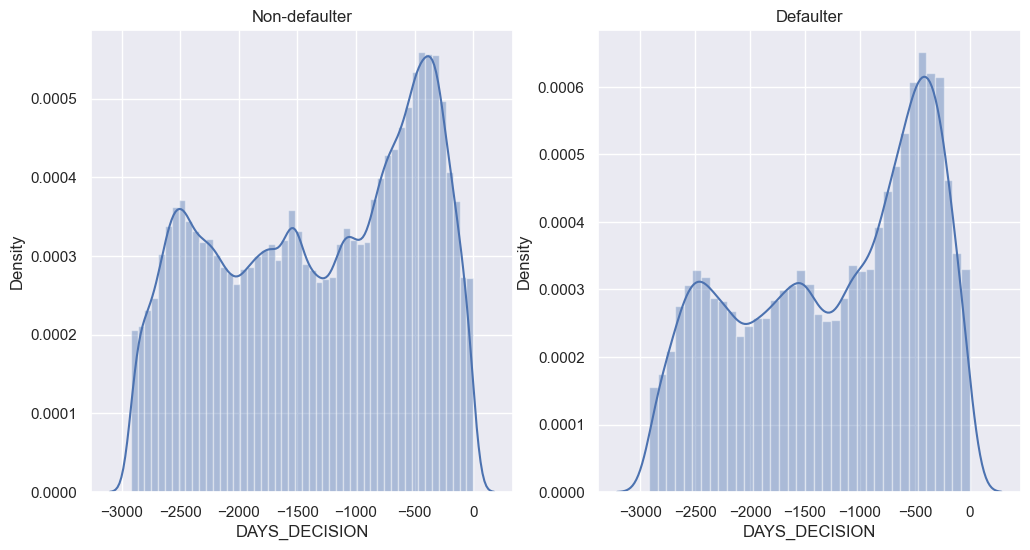

In [172]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.distplot(previous_merge_train[previous_merge_train["TARGET"] == 0]["DAYS_DECISION"].sort_values(), ax= ax[0]).set(title = "Non-defaulter")

sns.distplot(previous_merge_train[previous_merge_train["TARGET"] == 1]["DAYS_DECISION"].sort_values(), ax= ax[1]).set(title = "Defaulter")

# Comment: distribution giong nhau --> feature này không ảnh hưởng đến target lắm

<AxesSubplot:xlabel='NAME_TYPE_SUITE', ylabel='count'>

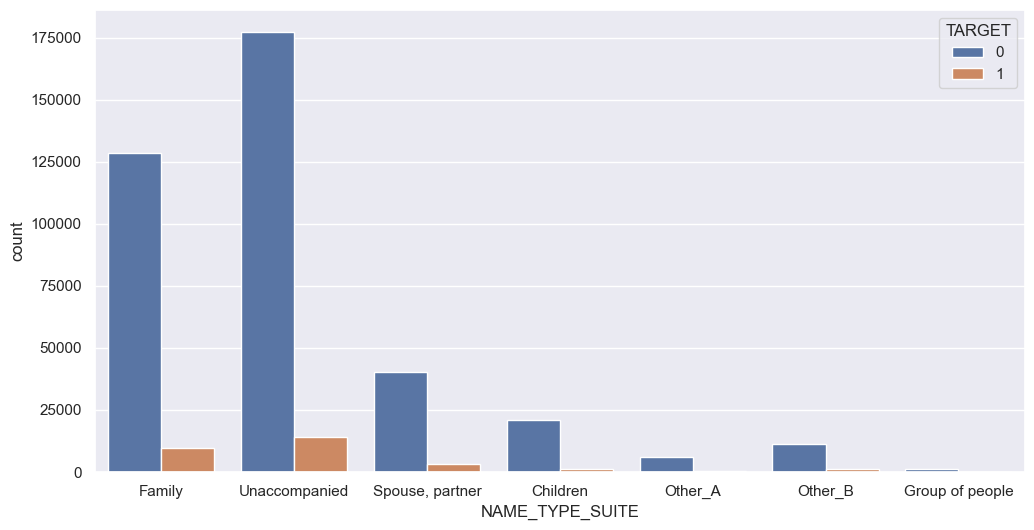

In [174]:
fig, ax = plt.subplots(figsize= (12,6))
sns.countplot(data = previous_merge_train, x = "NAME_TYPE_SUITE", hue = 'TARGET')

# Comment: Trend giống nhau, có thể feature này không ảnh hưởng đến biến TARGET


/var/folders/b0/n1lz5zk51z374mpb3hyxn5n00000gp/T/ipykernel_2153/2955000291.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(previous_merge_train[previous_merge_train["TARGET"] == 0]["SELLERPLACE_AREA"].sort_values(), ax= ax[0]).set(title = "Non-defaulter")
/var/folders/b0/n1lz5zk51z374mpb3hyxn5n00000gp/T/ipykernel_2153/2955000291.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation= 45)
/var/folders/b0/n1lz5zk51z374mpb3hyxn5n00000gp/T/ipykernel_2153/2955000291.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.

[Text(-10000.0, 0, ''),
 Text(0.0, 0, ''),
 Text(10000.0, 0, ''),
 Text(20000.0, 0, ''),
 Text(30000.0, 0, ''),
 Text(40000.0, 0, ''),
 Text(50000.0, 0, ''),
 Text(60000.0, 0, ''),
 Text(70000.0, 0, ''),
 Text(80000.0, 0, '')]

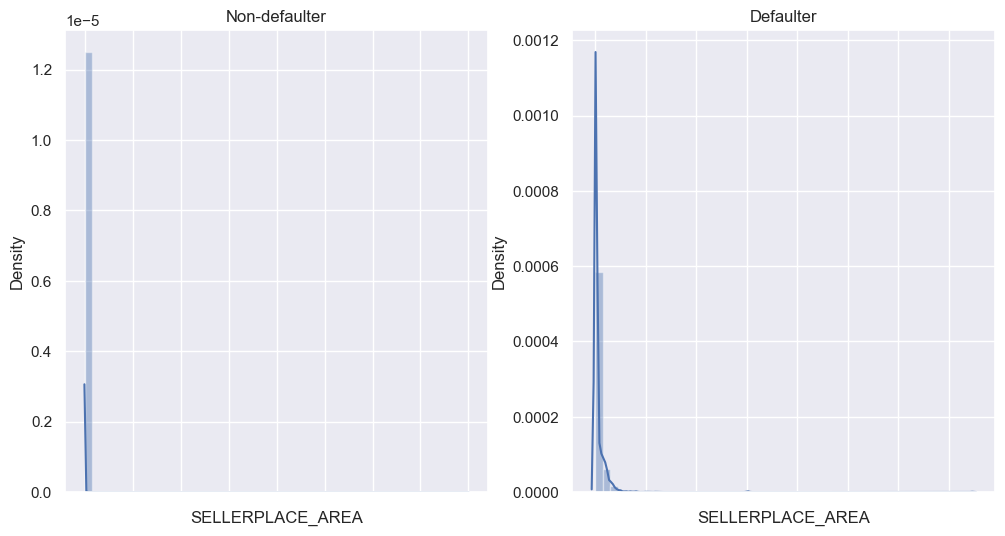

In [176]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.distplot(previous_merge_train[previous_merge_train["TARGET"] == 0]["SELLERPLACE_AREA"].sort_values(), ax= ax[0]).set(title = "Non-defaulter")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation= 45)

sns.distplot(previous_merge_train[previous_merge_train["TARGET"] == 1]["SELLERPLACE_AREA"].sort_values(), ax= ax[1]).set(title = "Defaulter")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation= 45)

# Comment: Distribution giống nhau, có thể feature này không ảnh hưởng đến biến TARGET

/var/folders/b0/n1lz5zk51z374mpb3hyxn5n00000gp/T/ipykernel_2153/3066733744.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(previous_merge_train[previous_merge_train["TARGET"] == 0]["CNT_PAYMENT"].sort_values(), ax= ax[0]).set(title = "Non-defaulter")
/var/folders/b0/n1lz5zk51z374mpb3hyxn5n00000gp/T/ipykernel_2153/3066733744.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation= 45)
/var/folders/b0/n1lz5zk51z374mpb3hyxn5n00000gp/T/ipykernel_2153/3066733744.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

P

[Text(-10.0, 0, ''),
 Text(0.0, 0, ''),
 Text(10.0, 0, ''),
 Text(20.0, 0, ''),
 Text(30.0, 0, ''),
 Text(40.0, 0, ''),
 Text(50.0, 0, ''),
 Text(60.0, 0, ''),
 Text(70.0, 0, '')]

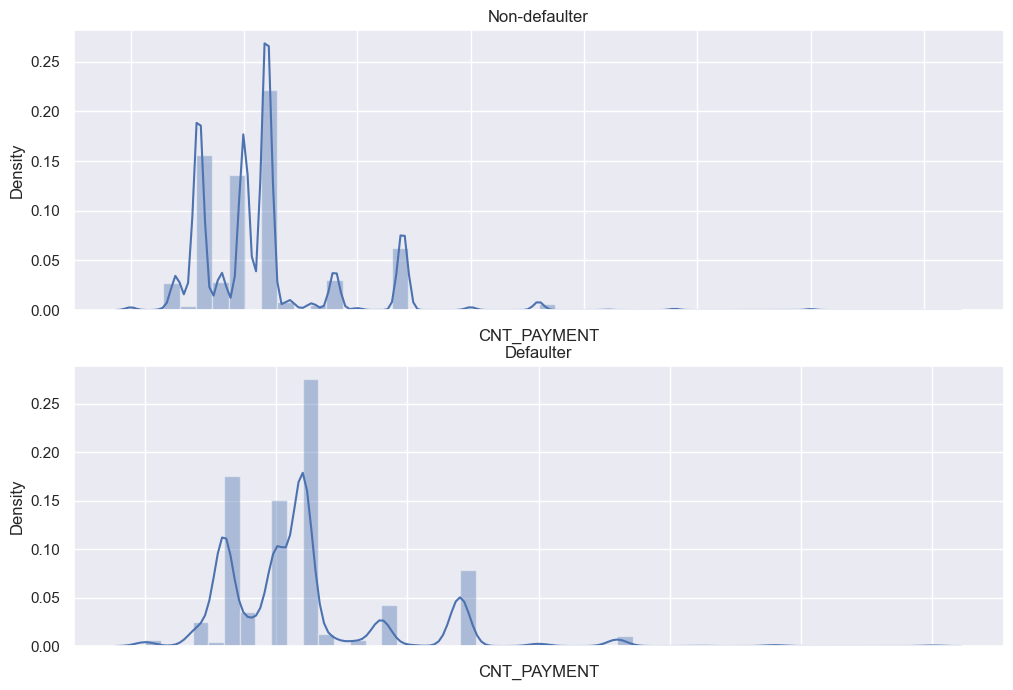

In [177]:
fig, ax = plt.subplots(2,1, figsize= (12,8))
sns.distplot(previous_merge_train[previous_merge_train["TARGET"] == 0]["CNT_PAYMENT"].sort_values(), ax= ax[0]).set(title = "Non-defaulter")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation= 45)

sns.distplot(previous_merge_train[previous_merge_train["TARGET"] == 1]["CNT_PAYMENT"].sort_values(), ax= ax[1]).set(title = "Defaulter")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation= 45)

/var/folders/b0/n1lz5zk51z374mpb3hyxn5n00000gp/T/ipykernel_2153/168429701.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(previous_merge_train[previous_merge_train["TARGET"] == 0]["DAYS_DECISION"].sort_values(), ax= ax[0]).set(title = "Non-defaulter")
/var/folders/b0/n1lz5zk51z374mpb3hyxn5n00000gp/T/ipykernel_2153/168429701.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation= 45)
/var/folders/b0/n1lz5zk51z374mpb3hyxn5n00000gp/T/ipykernel_2153/168429701.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Pl

[Text(-3500.0, 0, ''),
 Text(-3000.0, 0, ''),
 Text(-2500.0, 0, ''),
 Text(-2000.0, 0, ''),
 Text(-1500.0, 0, ''),
 Text(-1000.0, 0, ''),
 Text(-500.0, 0, ''),
 Text(0.0, 0, ''),
 Text(500.0, 0, '')]

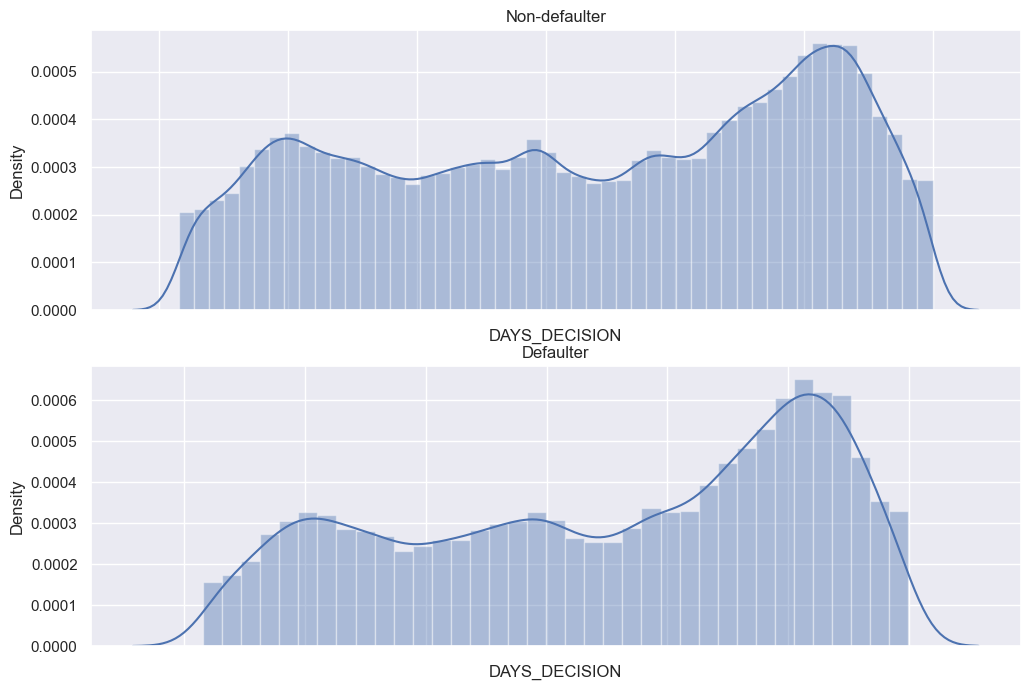

In [178]:
fig, ax = plt.subplots(2,1, figsize= (12,8))
sns.distplot(previous_merge_train[previous_merge_train["TARGET"] == 0]["DAYS_DECISION"].sort_values(), ax= ax[0]).set(title = "Non-defaulter")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation= 45)

sns.distplot(previous_merge_train[previous_merge_train["TARGET"] == 1]["DAYS_DECISION"].sort_values(), ax= ax[1]).set(title = "Defaulter")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation= 45)

/var/folders/b0/n1lz5zk51z374mpb3hyxn5n00000gp/T/ipykernel_2153/3843813582.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(previous_merge_train[previous_merge_train["TARGET"] == 0]["RATE_DOWN_PAYMENT"].sort_values(), ax= ax[0]).set(title = "Non-defaulter")
/var/folders/b0/n1lz5zk51z374mpb3hyxn5n00000gp/T/ipykernel_2153/3843813582.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation= 45)
/var/folders/b0/n1lz5zk51z374mpb3hyxn5n00000gp/T/ipykernel_2153/3843813582.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14

[Text(-0.2, 0, ''),
 Text(0.0, 0, ''),
 Text(0.2, 0, ''),
 Text(0.4000000000000001, 0, ''),
 Text(0.6000000000000001, 0, ''),
 Text(0.8, 0, ''),
 Text(1.0000000000000002, 0, '')]

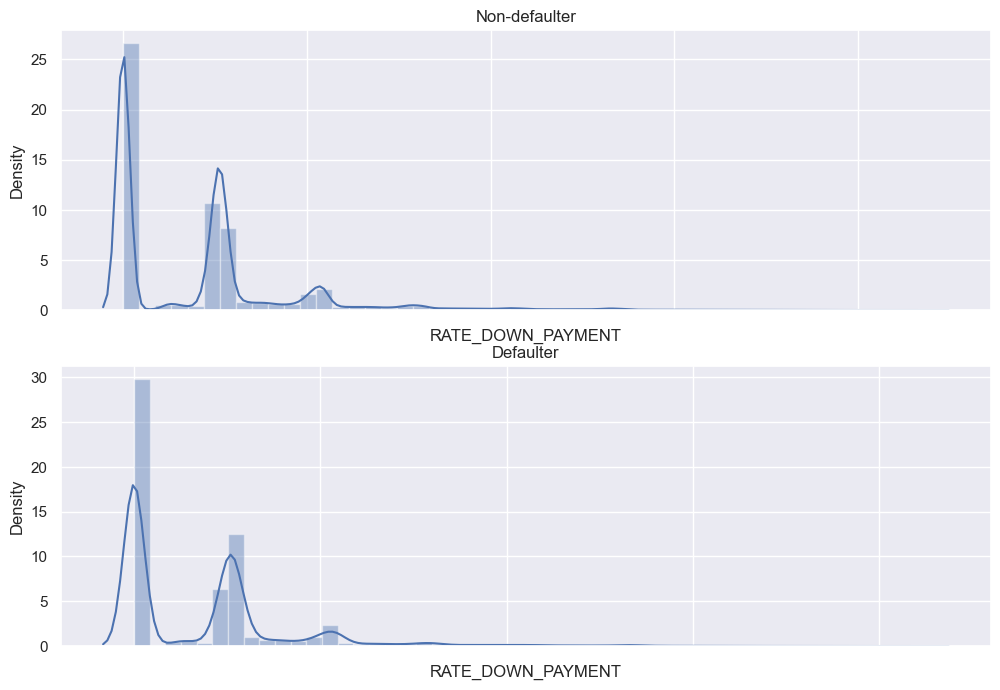

In [180]:
fig, ax = plt.subplots(2,1, figsize= (12,8))
sns.distplot(previous_merge_train[previous_merge_train["TARGET"] == 0]["RATE_DOWN_PAYMENT"].sort_values(), ax= ax[0]).set(title = "Non-defaulter")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation= 45)

sns.distplot(previous_merge_train[previous_merge_train["TARGET"] == 1]["RATE_DOWN_PAYMENT"].sort_values(), ax= ax[1]).set(title = "Defaulter")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation= 45)

# Comment: defaulter có down payment thấp hơn

### Categorical feature

<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

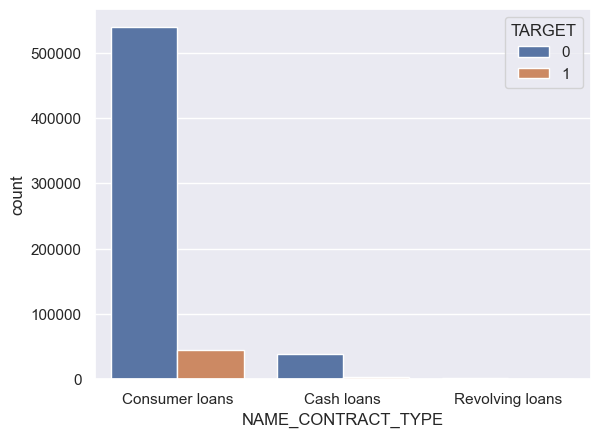

In [183]:
sns.countplot(data = previous_merge_train, x = previous_merge_train["NAME_CONTRACT_TYPE"], hue= previous_merge_train["TARGET"])

# COMMENT: HẦU HẾT LÀ CONSUMER_LOANS

In [215]:
df2 = previous_merge_train[previous_merge_train["NAME_CONTRACT_STATUS"] == "Refused"]["CODE_REJECT_REASON"].value_counts().reset_index()
df2

# Comment: SCO, LIMIT, HC là những lý do bị refused nhiều nhất

,index,CODE_REJECT_REASON
0,LIMIT,23888
1,SCO,19775
2,HC,19725
3,SCOFR,592
4,VERIF,484
5,XNA,249
6,SYSTEM,3


In [ ]:
previous_merge_train

<AxesSubplot:xlabel='NFLAG_INSURED_ON_APPROVAL', ylabel='count'>

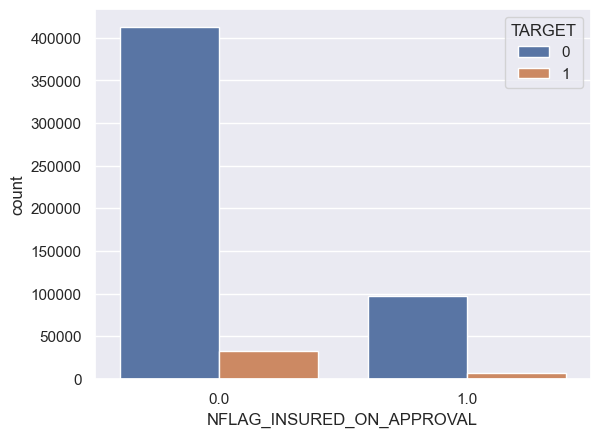

In [216]:
sns.countplot(data = previous_merge_train, x = "NFLAG_INSURED_ON_APPROVAL", hue= previous_merge_train["TARGET"])

<AxesSubplot:xlabel='NAME_CLIENT_TYPE', ylabel='count'>

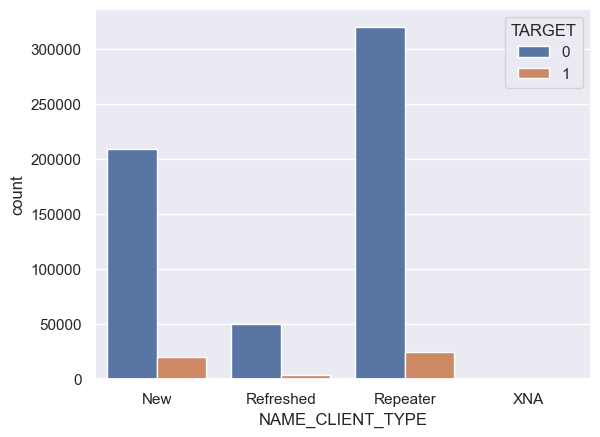

In [218]:
sns.countplot(data = previous_merge_train,x="NAME_CLIENT_TYPE", hue= previous_merge_train["TARGET"])
## Comment: không có sự khác nhau về tren, có thể thấy phần lớn người vay là repeater (khách hàng trung thành)

<AxesSubplot:xlabel='count', ylabel='NAME_PAYMENT_TYPE'>

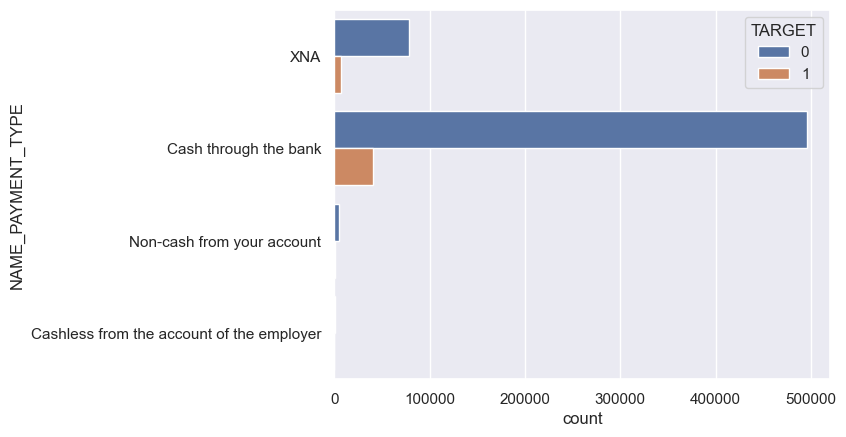

In [224]:

sns.countplot( data = previous_merge_train, y = "NAME_PAYMENT_TYPE", hue= previous_merge_train["TARGET"])
## cash through bank là phương thức được sử dụng nhiều nhất

<AxesSubplot:xlabel='count', ylabel='NAME_GOODS_CATEGORY'>

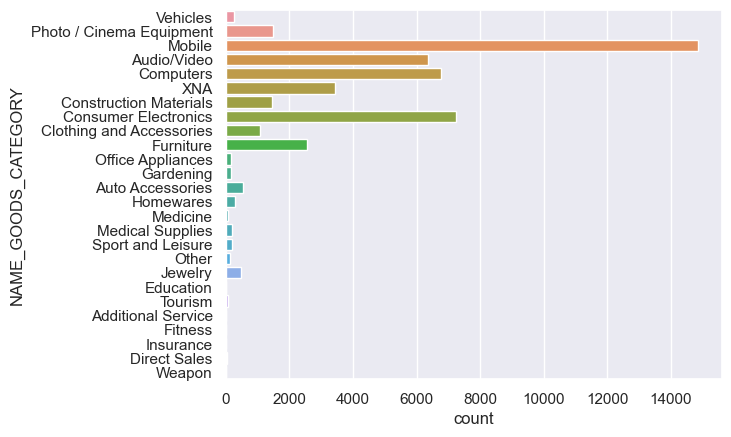

In [256]:

sns.countplot( data = previous_merge_train[previous_merge_train['TARGET'] == 1], y = "NAME_GOODS_CATEGORY")
## MOST: mobile

<AxesSubplot:xlabel='NAME_PORTFOLIO', ylabel='count'>

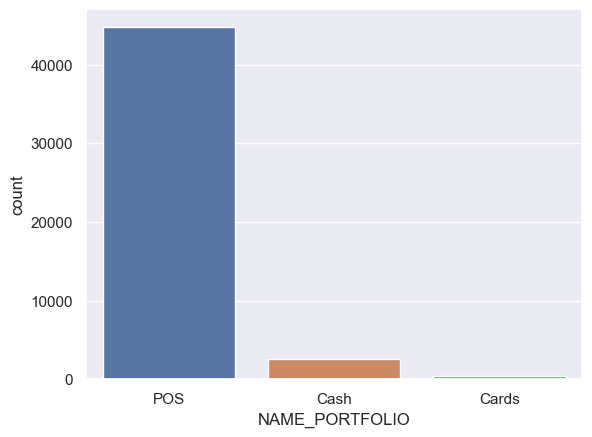

In [257]:
sns.countplot( data = previous_merge_train[previous_merge_train['TARGET'] == 1], x  = "NAME_PORTFOLIO")

<AxesSubplot:xlabel='NAME_PRODUCT_TYPE', ylabel='count'>

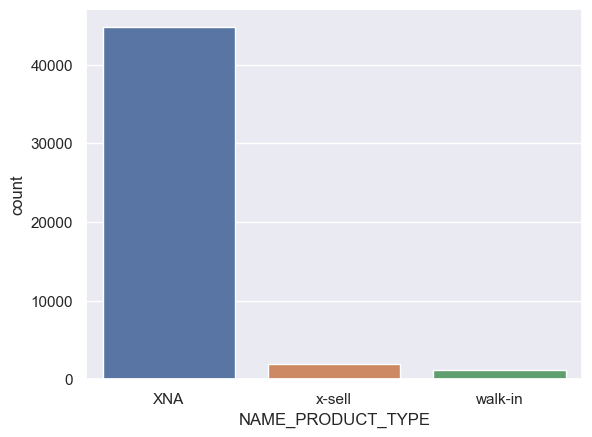

In [258]:
sns.countplot( data = previous_merge_train[previous_merge_train['TARGET'] == 1], x  = "NAME_PRODUCT_TYPE")

<AxesSubplot:xlabel='CHANNEL_TYPE', ylabel='count'>

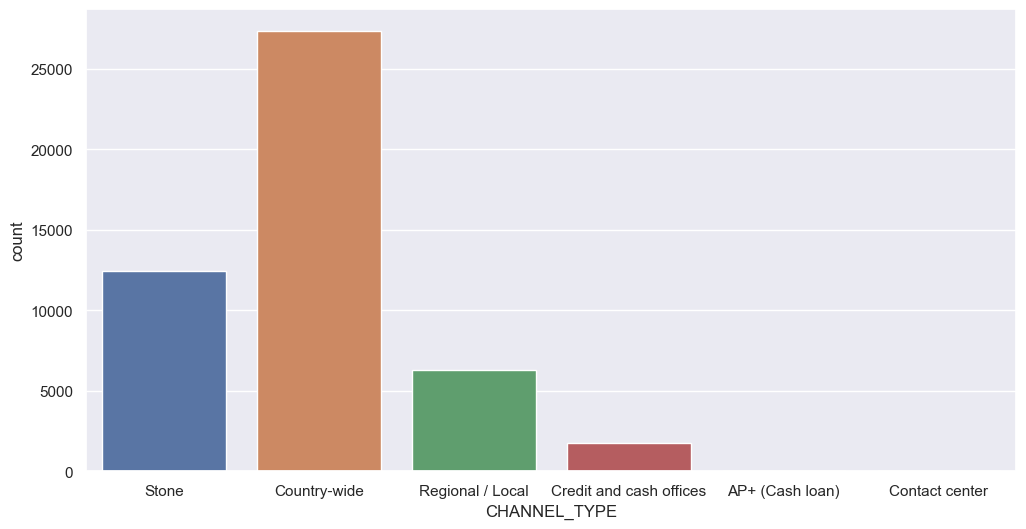

In [261]:
Ffig, ax = plt.subplots(figsize = (12,6))
sns.countplot( data = previous_merge_train[previous_merge_train['TARGET'] == 1], x  = "CHANNEL_TYPE")

<AxesSubplot:xlabel='CHANNEL_TYPE', ylabel='count'>

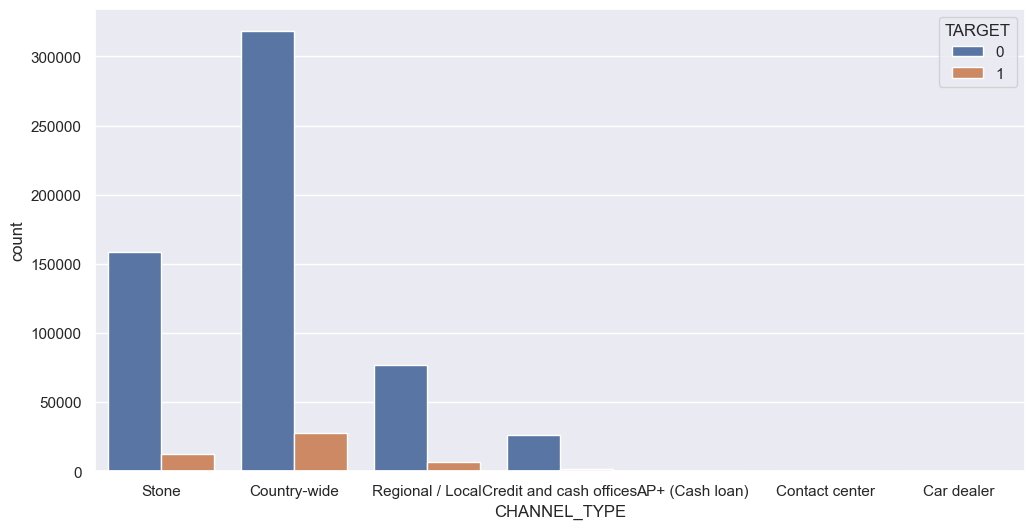

In [262]:
Ffig, ax = plt.subplots(figsize = (12,6))
sns.countplot( data = previous_merge_train, x  = "CHANNEL_TYPE", hue = 'TARGET')

<AxesSubplot:xlabel='PRODUCT_COMBINATION', ylabel='count'>

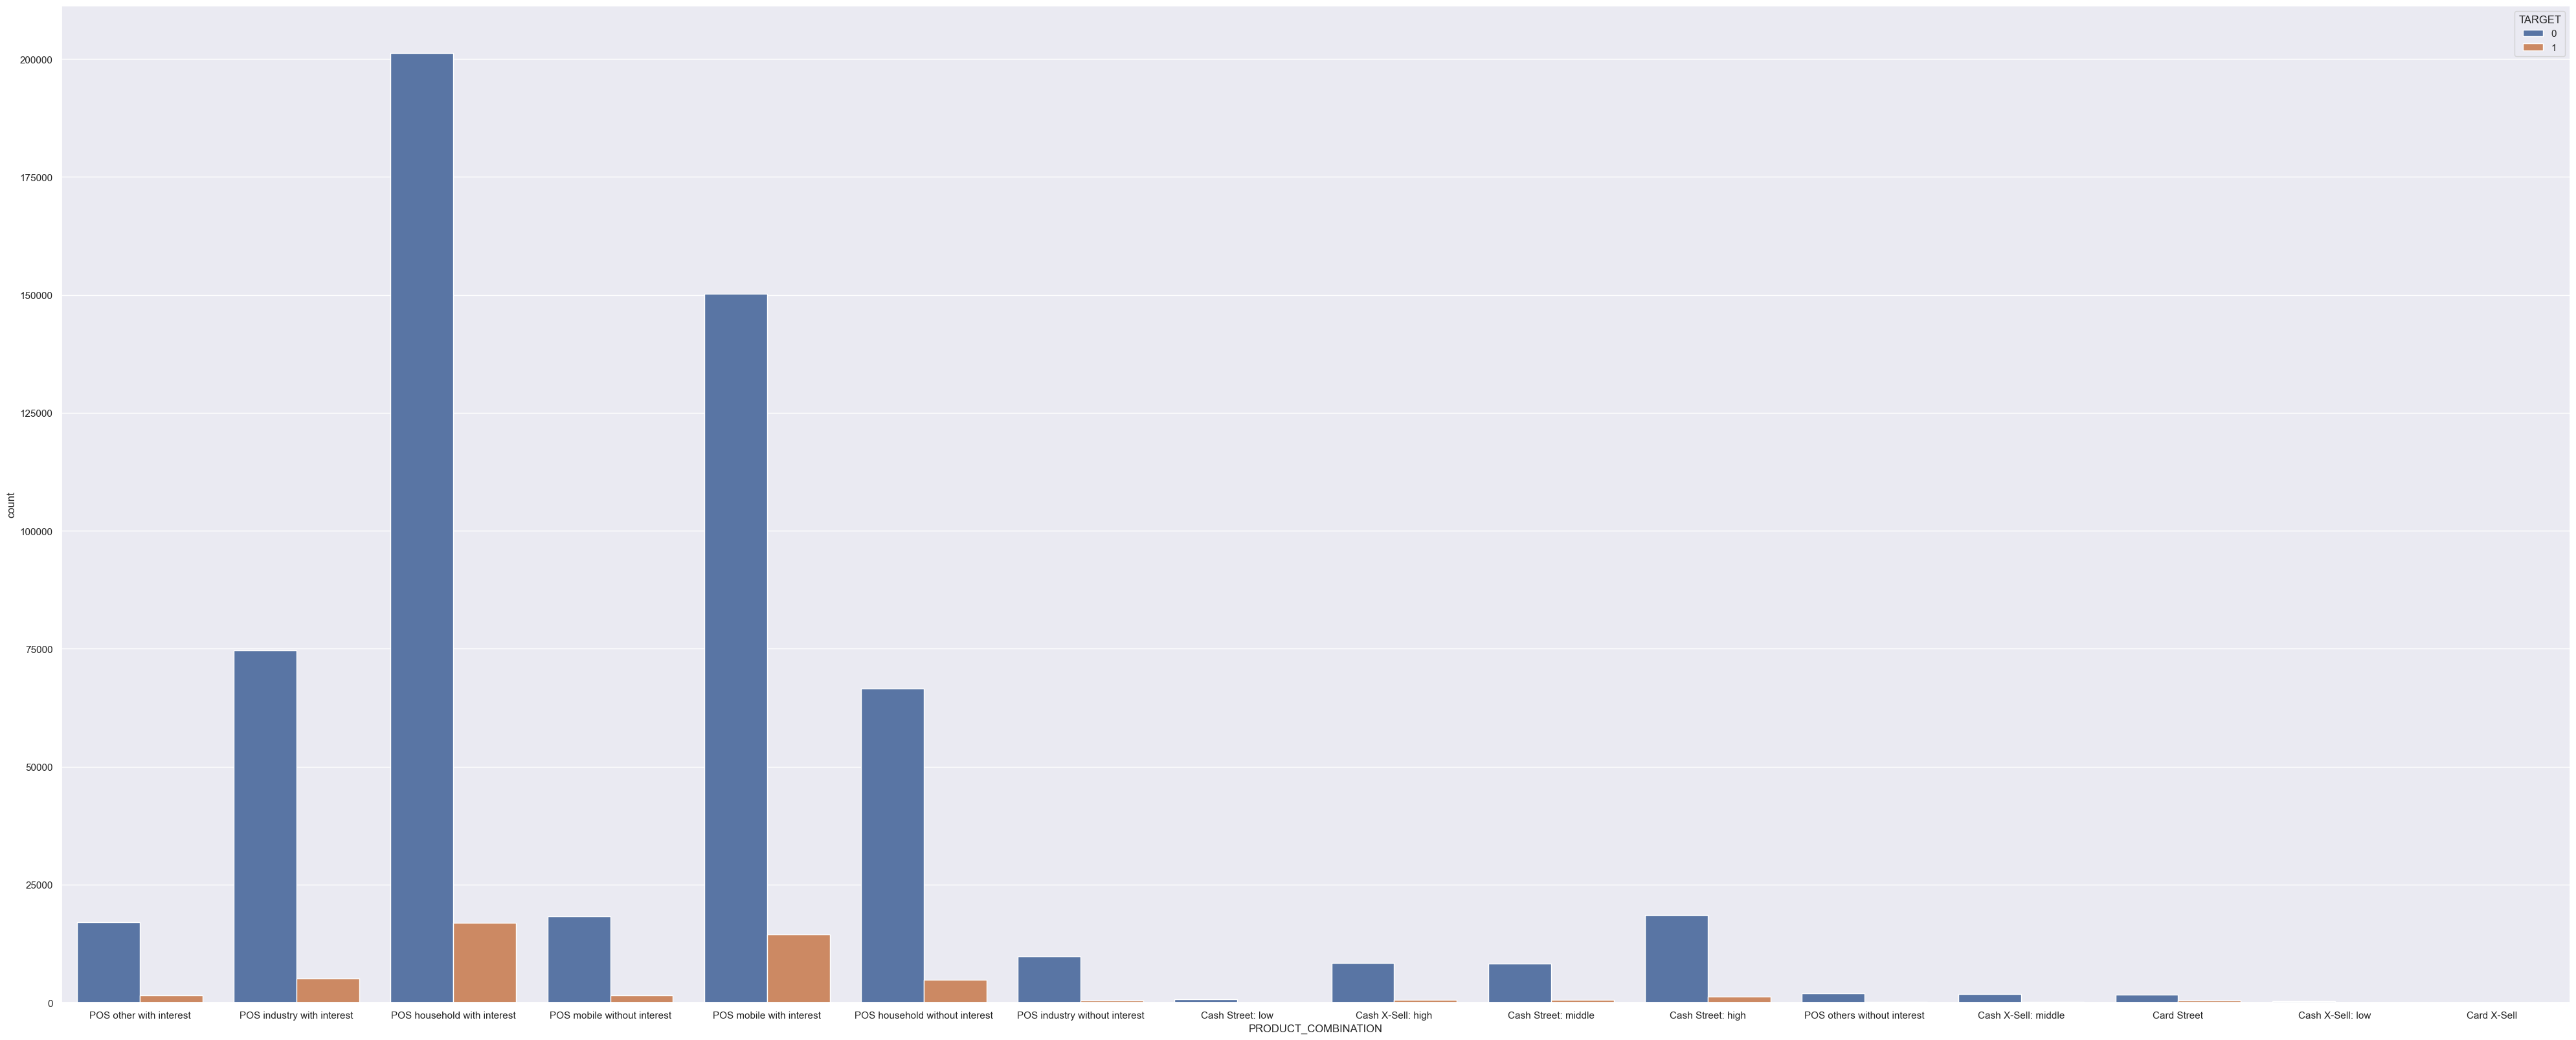

In [264]:
Ffig, ax = plt.subplots(figsize = (50,20))
sns.countplot( data = previous_merge_train, x  = "PRODUCT_COMBINATION", hue = 'TARGET')

<AxesSubplot:xlabel='NAME_CASH_LOAN_PURPOSE', ylabel='count'>

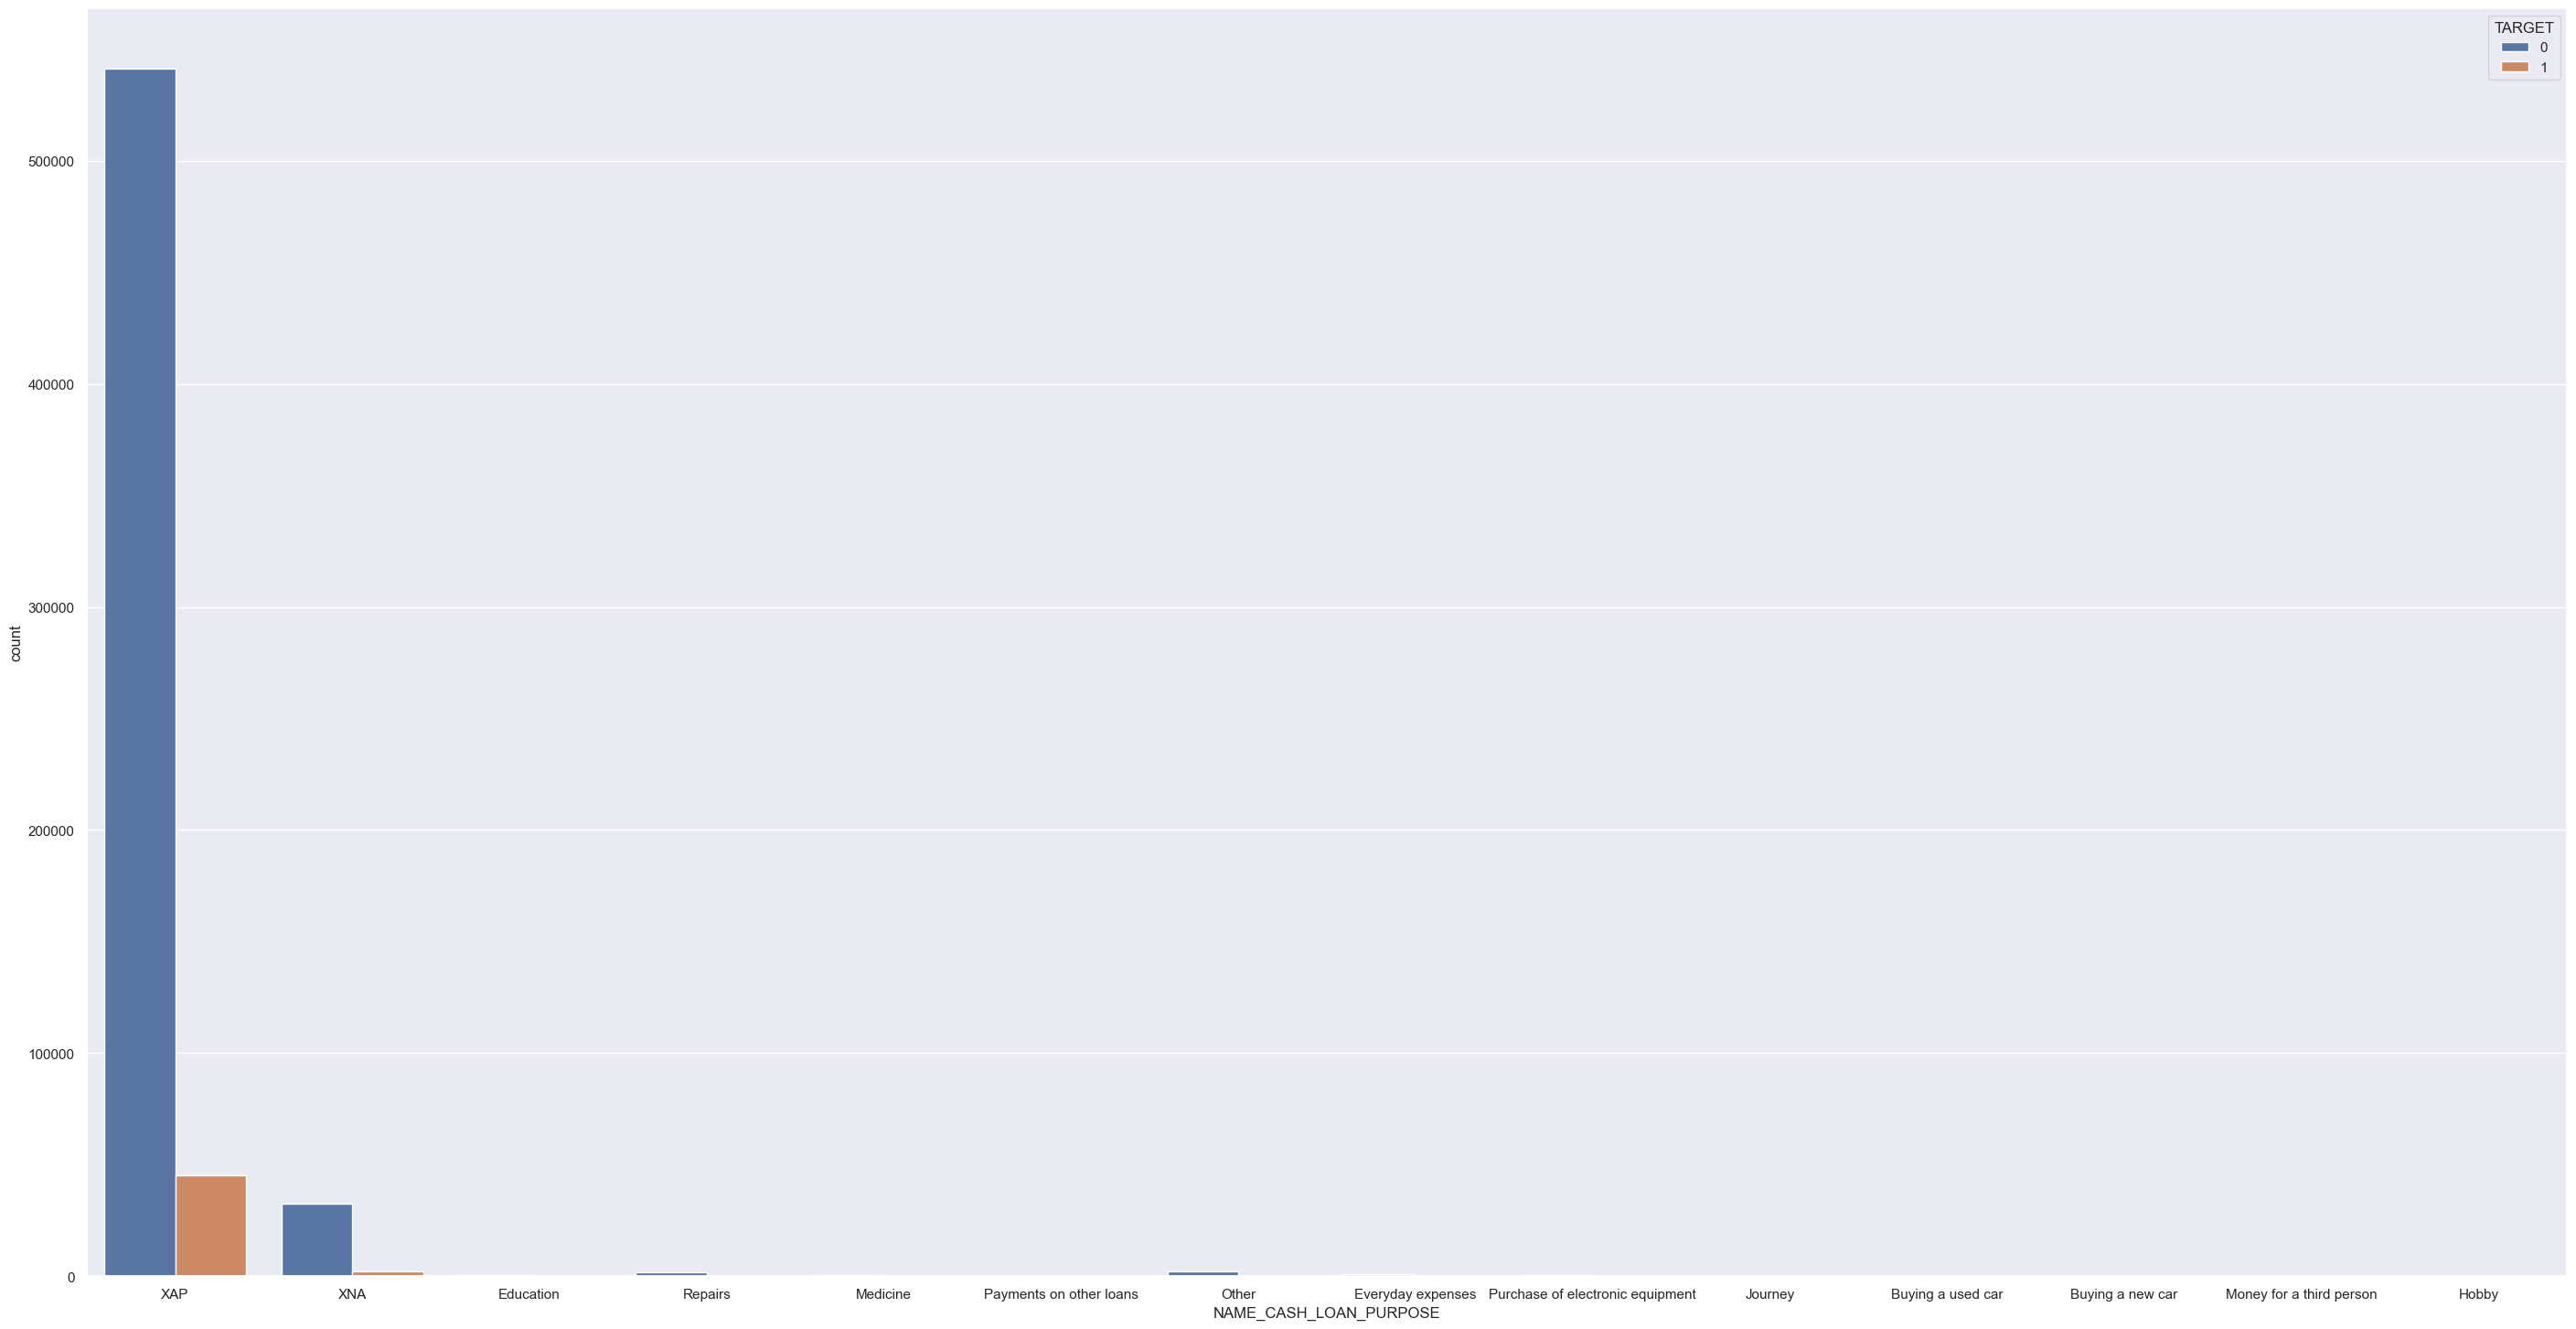

In [266]:
Ffig, ax = plt.subplots(figsize = (35,18))
sns.countplot( data = previous_merge_train, x  = "NAME_CASH_LOAN_PURPOSE", hue = 'TARGET')

In [ ]:
""" DROP columns: 
DAYS_TERMINATION
AMT_GOODS_PRICE
AMT_APPLICATION
RATE_INTEREST_PRIMARY
RATE_INTEREST_PRIVILEDGED
FLAG_LAST_APPL_PER_CONTRACT
CODE_REJECT_REASON
NAME_CASH_LOAN_PURPOSE
DAYS_FIRST_DRAWING

(replace row value > 350000)
"""

###

# Update: 1670214 rows × 28 columns